In [1]:
import pandas as pd
import numpy as np
import warnings

#importing important libraries that we will use

import math
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = [16, 12]
from collections import OrderedDict
warnings.filterwarnings('ignore')

In [2]:
#Reading the data

In [3]:
prices_df = pd.read_csv('prices_file (1).csv')
trades_df = pd.read_csv('trades_file (1).csv')

In [4]:
#Checking if any data is missing

In [5]:
tab_info=pd.DataFrame(prices_df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(prices_df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(prices_df.isnull().sum()/prices_df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

time  symbol    price
column type       object  object  float64
null values (nb)       0       0        0
null values (%)        0       0        0

In [6]:
tab_info=pd.DataFrame(trades_df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(trades_df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(trades_df.isnull().sum()/trades_df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

time  symbol tradeSize tradePrice
column type       object  object   float64    float64
null values (nb)       0       0         0          0
null values (%)        0       0         0          0

In [7]:
#checking data types

In [8]:
prices_df.dtypes

time       object
symbol     object
price     float64
dtype: object

In [9]:
trades_df.dtypes

time           object
symbol         object
tradeSize     float64
tradePrice    float64
dtype: object

In [10]:
prices_df.head(5)

time      symbol     price
0  09:16:00  STOCK_5559  2158.950
1  09:16:00  STOCK_3848  2035.325
2  09:16:00  STOCK_3940  1970.325
3  09:16:00  STOCK_3643  1864.125
4  09:16:00  STOCK_3447  1772.025

In [11]:
trades_df.head(5)

time      symbol  tradeSize  tradePrice
0  09:18:29  STOCK_4487       -1.0       22.95
1  09:18:31  STOCK_3584        4.0       21.80
2  09:18:34  STOCK_3584       -4.0       21.65
3  09:19:18  STOCK_4487       -2.0       19.45
4  09:19:18  STOCK_4487       -2.0       19.45

In [12]:
#lets count number of stocks in both dataset

In [13]:
num_stocks_prices = prices_df['symbol'].unique()
num_stocks_prices.sort()
num_stocks_prices

array(['STOCK_3130', 'STOCK_3138', 'STOCK_3140', 'STOCK_3177',
       'STOCK_3213', 'STOCK_3228', 'STOCK_3245', 'STOCK_3311',
       'STOCK_3337', 'STOCK_3365', 'STOCK_3401', 'STOCK_3415',
       'STOCK_3439', 'STOCK_3447', 'STOCK_3561', 'STOCK_3584',
       'STOCK_3643', 'STOCK_3660', 'STOCK_3666', 'STOCK_3682',
       'STOCK_3683', 'STOCK_3824', 'STOCK_3848', 'STOCK_3870',
       'STOCK_3887', 'STOCK_3896', 'STOCK_3940', 'STOCK_3954',
       'STOCK_3979', 'STOCK_4060', 'STOCK_4063', 'STOCK_4073',
       'STOCK_4127', 'STOCK_4137', 'STOCK_4144', 'STOCK_4146',
       'STOCK_4154', 'STOCK_4198', 'STOCK_4239', 'STOCK_4310',
       'STOCK_4381', 'STOCK_4427', 'STOCK_4441', 'STOCK_4450',
       'STOCK_4487', 'STOCK_4518', 'STOCK_4548', 'STOCK_4580',
       'STOCK_4583', 'STOCK_4688', 'STOCK_4699', 'STOCK_4731',
       'STOCK_4771', 'STOCK_4781', 'STOCK_4783', 'STOCK_4890',
       'STOCK_4917', 'STOCK_4935', 'STOCK_4949', 'STOCK_4989',
       'STOCK_4993', 'STOCK_5047', 'STOCK_5050', 'STOCK

In [14]:
len(num_stocks_prices)

80

In [15]:
num_stocks_trades = trades_df['symbol'].unique()
num_stocks_trades.sort()
num_stocks_trades

array(['STOCK_3177', 'STOCK_3228', 'STOCK_3439', 'STOCK_3561',
       'STOCK_3584', 'STOCK_3660', 'STOCK_3870', 'STOCK_3896',
       'STOCK_3979', 'STOCK_4154', 'STOCK_4487', 'STOCK_4548',
       'STOCK_4783', 'STOCK_4890', 'STOCK_4949', 'STOCK_5050',
       'STOCK_5150', 'STOCK_5226', 'STOCK_5628', 'STOCK_6061'],
      dtype=object)

In [16]:
len(num_stocks_trades)

20

now we know prices dataset has 80 unique symbol while trades dataset has 20 unique symbols

lets find remaining position of all the symbols after 03:14:59 PM

lets find all the trades of 1 stock during whole day for better understanding of datasets

All trades of symbol STOCK_3177 are as follows:

In [17]:
trades_df_b_1 = trades_df[trades_df['symbol'] == 'STOCK_3177']
print(trades_df_b_1)
trades_df_b_1['tradeSize'].sum()

         time      symbol  tradeSize  tradePrice
556  13:58:24  STOCK_3177        1.0      336.75
557  13:58:24  STOCK_3177        1.0      336.40
621  14:03:05  STOCK_3177       -1.0      365.90
622  14:03:05  STOCK_3177        2.0      365.95
623  14:03:05  STOCK_3177       -1.0      366.00
624  14:03:08  STOCK_3177       -1.0      367.15
625  14:03:08  STOCK_3177        3.0      367.50
626  14:03:10  STOCK_3177        3.0      367.85
627  14:03:10  STOCK_3177        1.0      367.85
841  14:21:47  STOCK_3177       -2.0      369.70
842  14:21:50  STOCK_3177        1.0      363.65
843  14:21:50  STOCK_3177       -1.0      363.60
844  14:21:52  STOCK_3177        1.0      364.45
845  14:21:52  STOCK_3177       -1.0      364.35
846  14:22:02  STOCK_3177        1.0      359.25
847  14:22:02  STOCK_3177        1.0      360.95
848  14:22:05  STOCK_3177       -1.0      351.45
849  14:22:05  STOCK_3177        1.0      351.30
850  14:22:07  STOCK_3177       -1.0      357.60
851  14:22:07  STOCK

4.0

In [18]:
#Remainings position

In [19]:
h_rem = {}
for i in num_stocks_trades:
    trades_df_b = trades_df[trades_df['symbol'] == i]
    print(f"{i} : {trades_df_b['tradeSize'].sum()}")
    h_rem[i] = trades_df_b['tradeSize'].sum()


STOCK_3177 : 4.0
STOCK_3228 : 14.0
STOCK_3439 : 4.0
STOCK_3561 : -10.0
STOCK_3584 : 14.0
STOCK_3660 : -4.0
STOCK_3870 : 2.0
STOCK_3896 : 32.0
STOCK_3979 : 2.0
STOCK_4154 : 24.0
STOCK_4487 : -7.0
STOCK_4548 : -36.0
STOCK_4783 : -18.0
STOCK_4890 : 26.0
STOCK_4949 : -2.0
STOCK_5050 : 46.0
STOCK_5150 : 10.0
STOCK_5226 : -26.0
STOCK_5628 : 16.0
STOCK_6061 : 52.0


Now for calculating total PNS , we calculate sum of each stock individually by multiplying (trade_size) and (trade price)

In [20]:
s = 0
h_sum = {}
for ele in num_stocks_trades:
    
    dd = trades_df[trades_df["symbol"] == ele][["tradeSize","tradePrice"]]
    Sum_Stock = dd.tradeSize * dd.tradePrice

    s+=Sum_Stock.sum()
    h_sum[ele] = Sum_Stock.sum()
    
print(f"     Total : {s}")    

     Total : 7860.650000000002


In [21]:
h_sum

{'STOCK_3177': 1443.8500000000004,
 'STOCK_3228': 130.10000000000002,
 'STOCK_3439': 797.7499999999993,
 'STOCK_3561': 862.5500000000004,
 'STOCK_3584': -36.5,
 'STOCK_3660': 0.20000000000000062,
 'STOCK_3870': 3131.9500000000007,
 'STOCK_3896': 330.8999999999999,
 'STOCK_3979': 847.1500000000001,
 'STOCK_4154': 1752.1500000000005,
 'STOCK_4487': -218.20000000000002,
 'STOCK_4548': -1041.6000000000001,
 'STOCK_4783': -408.3499999999998,
 'STOCK_4890': -437.0999999999999,
 'STOCK_4949': -662.35,
 'STOCK_5050': 98.85000000000016,
 'STOCK_5150': -30.349999999999923,
 'STOCK_5226': -556.25,
 'STOCK_5628': 1800.1000000000001,
 'STOCK_6061': 55.79999999999999}

now we have to square off all the remaining position with the price of stock at time 15:25:00.
for this first we will check how many stocks are common in price dataset and trades dataset as one has 80 stocks and other has 20 stocks
after this we will get the price of each stock at 15:25:00

In [22]:
pos_sq = prices_df[prices_df["time"] == "15:25:00"][["symbol","price"]]
pos_sq

symbol     price
29394  STOCK_5559  2422.300
29395  STOCK_3848  2320.900
29396  STOCK_3940  2221.875
29397  STOCK_3643  2118.800
29398  STOCK_3447  2019.975
...           ...       ...
29451  STOCK_4450  1079.175
29452  STOCK_3138  1180.000
29453  STOCK_5651  1267.700
29454  STOCK_5998  1371.175
29455  STOCK_4198  1456.375

[62 rows x 2 columns]

In [23]:
#finding all commom stocks
#their prices at 15:25:00

Com_stocks={}
for i in range(len(pos_sq['symbol'])):
    if pos_sq['symbol'].iloc[i] in num_stocks_trades:
        if pos_sq['symbol'].iloc[i] in Com_stocks:
            Com_stocks[pos_sq['symbol'].iloc[i]].append(pos_sq['price'].iloc[i])
        else:
            Com_stocks[pos_sq['symbol'].iloc[i]] = [pos_sq['price'].iloc[i]]
        
print(Com_stocks)

{'STOCK_3979': [420.82500000000016], 'STOCK_5628': [220.4], 'STOCK_3561': [120.775], 'STOCK_5226': [20.8], 'STOCK_4548': [0.125], 'STOCK_4487': [0.075], 'STOCK_6061': [0.075], 'STOCK_3660': [0.075], 'STOCK_3584': [0.075], 'STOCK_5150': [0.125], 'STOCK_3228': [0.075], 'STOCK_3896': [0.125], 'STOCK_4890': [0.125], 'STOCK_5050': [0.125], 'STOCK_4154': [0.125], 'STOCK_4949': [0.125], 'STOCK_4783': [0.075], 'STOCK_3870': [79.19999999999997], 'STOCK_3177': [179.22500000000005], 'STOCK_3439': [279.025]}


In [24]:
#sorting data

In [25]:
Sorted_Com_stocks = OrderedDict(sorted(Com_stocks.items()))
Sorted_Com_stocks

OrderedDict([('STOCK_3177', [179.22500000000005]),
             ('STOCK_3228', [0.075]),
             ('STOCK_3439', [279.025]),
             ('STOCK_3561', [120.775]),
             ('STOCK_3584', [0.075]),
             ('STOCK_3660', [0.075]),
             ('STOCK_3870', [79.19999999999997]),
             ('STOCK_3896', [0.125]),
             ('STOCK_3979', [420.82500000000016]),
             ('STOCK_4154', [0.125]),
             ('STOCK_4487', [0.075]),
             ('STOCK_4548', [0.125]),
             ('STOCK_4783', [0.075]),
             ('STOCK_4890', [0.125]),
             ('STOCK_4949', [0.125]),
             ('STOCK_5050', [0.125]),
             ('STOCK_5150', [0.125]),
             ('STOCK_5226', [20.8]),
             ('STOCK_5628', [220.4]),
             ('STOCK_6061', [0.075])])

we will create a dataset by using all the relevants columns

where

stock -- stock name

sum_stocks -- sum of all positions of stock till 03:15:00

remain_trade -- position to be squared off

final_price -- price of stock at 15:25:00

In [26]:
d={}
d["stock"] = []
d['sum_stocks'] = []
d['remain_trade'] = []
d['final_price'] = []
for k in num_stocks_trades:
    d["stock"].append(k)
    d['sum_stocks'].append(h_sum[k])
    d['remain_trade'].append(h_rem[k])
    d['final_price'].append(Com_stocks[k][0])
    

In [27]:
new_df = pd.DataFrame.from_dict(d)

In [28]:
new_df

stock  sum_stocks  remain_trade  final_price
0   STOCK_3177     1443.85           4.0      179.225
1   STOCK_3228      130.10          14.0        0.075
2   STOCK_3439      797.75           4.0      279.025
3   STOCK_3561      862.55         -10.0      120.775
4   STOCK_3584      -36.50          14.0        0.075
5   STOCK_3660        0.20          -4.0        0.075
6   STOCK_3870     3131.95           2.0       79.200
7   STOCK_3896      330.90          32.0        0.125
8   STOCK_3979      847.15           2.0      420.825
9   STOCK_4154     1752.15          24.0        0.125
10  STOCK_4487     -218.20          -7.0        0.075
11  STOCK_4548    -1041.60         -36.0        0.125
12  STOCK_4783     -408.35         -18.0        0.075
13  STOCK_4890     -437.10          26.0        0.125
14  STOCK_4949     -662.35          -2.0        0.125
15  STOCK_5050       98.85          46.0        0.125
16  STOCK_5150      -30.35          10.0        0.125
17  STOCK_5226     -556.25         -26.0       20.800
18  STOCK_5628     1800.10          16.0      220.400
19  STOCK_6061       55.80          52.0        0.075

we will create a column in our new dataset by multiplying remain_trade with opposite sign as we need to square off positions

In [29]:
squared_off_trade= new_df
squared_off_trade['squared_off_trade'] = squared_off_trade['remain_trade'] * (-1)
new_df

stock  sum_stocks  remain_trade  final_price  squared_off_trade
0   STOCK_3177     1443.85           4.0      179.225               -4.0
1   STOCK_3228      130.10          14.0        0.075              -14.0
2   STOCK_3439      797.75           4.0      279.025               -4.0
3   STOCK_3561      862.55         -10.0      120.775               10.0
4   STOCK_3584      -36.50          14.0        0.075              -14.0
5   STOCK_3660        0.20          -4.0        0.075                4.0
6   STOCK_3870     3131.95           2.0       79.200               -2.0
7   STOCK_3896      330.90          32.0        0.125              -32.0
8   STOCK_3979      847.15           2.0      420.825               -2.0
9   STOCK_4154     1752.15          24.0        0.125              -24.0
10  STOCK_4487     -218.20          -7.0        0.075                7.0
11  STOCK_4548    -1041.60         -36.0        0.125               36.0
12  STOCK_4783     -408.35         -18.0        0.075               18.0
13  STOCK_4890     -437.10          26.0        0.125              -26.0
14  STOCK_4949     -662.35          -2.0        0.125                2.0
15  STOCK_5050       98.85          46.0        0.125              -46.0
16  STOCK_5150      -30.35          10.0        0.125              -10.0
17  STOCK_5226     -556.25         -26.0       20.800               26.0
18  STOCK_5628     1800.10          16.0      220.400              -16.0
19  STOCK_6061       55.80          52.0        0.075              -52.0

now we calculate sum for each stock which comes after squaring off position(cal_sum)

In [30]:
new_df['cal_sum'] = new_df.final_price * new_df.squared_off_trade
new_df

stock  sum_stocks  remain_trade  final_price  squared_off_trade  \
0   STOCK_3177     1443.85           4.0      179.225               -4.0   
1   STOCK_3228      130.10          14.0        0.075              -14.0   
2   STOCK_3439      797.75           4.0      279.025               -4.0   
3   STOCK_3561      862.55         -10.0      120.775               10.0   
4   STOCK_3584      -36.50          14.0        0.075              -14.0   
5   STOCK_3660        0.20          -4.0        0.075                4.0   
6   STOCK_3870     3131.95           2.0       79.200               -2.0   
7   STOCK_3896      330.90          32.0        0.125              -32.0   
8   STOCK_3979      847.15           2.0      420.825               -2.0   
9   STOCK_4154     1752.15          24.0        0.125              -24.0   
10  STOCK_4487     -218.20          -7.0        0.075                7.0   
11  STOCK_4548    -1041.60         -36.0        0.125               36.0   
12  STOCK_4783     -408.35         -18.0        0.075               18.0   
13  STOCK_4890     -437.10          26.0        0.125              -26.0   
14  STOCK_4949     -662.35          -2.0        0.125                2.0   
15  STOCK_5050       98.85          46.0        0.125              -46.0   
16  STOCK_5150      -30.35          10.0        0.125              -10.0   
17  STOCK_5226     -556.25         -26.0       20.800               26.0   
18  STOCK_5628     1800.10          16.0      220.400              -16.0   
19  STOCK_6061       55.80          52.0        0.075              -52.0   

     cal_sum  
0   -716.900  
1     -1.050  
2  -1116.100  
3   1207.750  
4     -1.050  
5      0.300  
6   -158.400  
7     -4.000  
8   -841.650  
9     -3.000  
10     0.525  
11     4.500  
12     1.350  
13    -3.250  
14     0.250  
15    -5.750  
16    -1.250  
17   540.800  
18 -3526.400  
19    -3.900

we calculate overall profit or loss of stock and named as overall_sum if the sign of overall_sum is negative that implies the loss for stock, if sign is positive the loss for stock

In [31]:
new_df['overall_sum'] = new_df.sum_stocks + new_df.cal_sum
new_df

stock  sum_stocks  remain_trade  final_price  squared_off_trade  \
0   STOCK_3177     1443.85           4.0      179.225               -4.0   
1   STOCK_3228      130.10          14.0        0.075              -14.0   
2   STOCK_3439      797.75           4.0      279.025               -4.0   
3   STOCK_3561      862.55         -10.0      120.775               10.0   
4   STOCK_3584      -36.50          14.0        0.075              -14.0   
5   STOCK_3660        0.20          -4.0        0.075                4.0   
6   STOCK_3870     3131.95           2.0       79.200               -2.0   
7   STOCK_3896      330.90          32.0        0.125              -32.0   
8   STOCK_3979      847.15           2.0      420.825               -2.0   
9   STOCK_4154     1752.15          24.0        0.125              -24.0   
10  STOCK_4487     -218.20          -7.0        0.075                7.0   
11  STOCK_4548    -1041.60         -36.0        0.125               36.0   
12  STOCK_4783     -408.35         -18.0        0.075               18.0   
13  STOCK_4890     -437.10          26.0        0.125              -26.0   
14  STOCK_4949     -662.35          -2.0        0.125                2.0   
15  STOCK_5050       98.85          46.0        0.125              -46.0   
16  STOCK_5150      -30.35          10.0        0.125              -10.0   
17  STOCK_5226     -556.25         -26.0       20.800               26.0   
18  STOCK_5628     1800.10          16.0      220.400              -16.0   
19  STOCK_6061       55.80          52.0        0.075              -52.0   

     cal_sum  overall_sum  
0   -716.900      726.950  
1     -1.050      129.050  
2  -1116.100     -318.350  
3   1207.750     2070.300  
4     -1.050      -37.550  
5      0.300        0.500  
6   -158.400     2973.550  
7     -4.000      326.900  
8   -841.650        5.500  
9     -3.000     1749.150  
10     0.525     -217.675  
11     4.500    -1037.100  
12     1.350     -407.000  
13    -3.250     -440.350  
14     0.250     -662.100  
15    -5.750       93.100  
16    -1.250      -31.600  
17   540.800      -15.450  
18 -3526.400    -1726.300  
19    -3.900       51.900

In [32]:
#finding overall sum

new_df['overall_sum'].sum()

3233.4250000000006

as it is positive that means net is loss

max profit value by finding most negative value in over_all sum

In [33]:
new_df['overall_sum'].min()

-1726.3

finding stock name which has max profit or most negative value

In [34]:

st_at_min = new_df[new_df['overall_sum'] == new_df['overall_sum'].min()]
print(f"{st_at_min.stock} : {new_df['overall_sum'].min()} ")

18    STOCK_5628
Name: stock, dtype: object : -1726.3 


max loss value by finding most positive value in overall_sum

In [35]:
new_df['overall_sum'].max()

2973.5500000000006

finding stock name which has min profit or most positive value

In [36]:
st_at_max = new_df[new_df['overall_sum'] == new_df['overall_sum'].max()]
print(f"{st_at_max.stock} : {new_df['overall_sum'].max()} ")

6    STOCK_3870
Name: stock, dtype: object : 2973.5500000000006 


In [37]:
trades_df.head(5)

time      symbol  tradeSize  tradePrice
0  09:18:29  STOCK_4487       -1.0       22.95
1  09:18:31  STOCK_3584        4.0       21.80
2  09:18:34  STOCK_3584       -4.0       21.65
3  09:19:18  STOCK_4487       -2.0       19.45
4  09:19:18  STOCK_4487       -2.0       19.45

now we find profit or loss at each time stamp so our updated dataset has overall profit or loss till particular time stamp

In [38]:
updated_df = trades_df
trades_df['overall_PL'] = 0

su = 0
for i in range(len(trades_df)):
    su += updated_df.iloc[i,2]*updated_df.iloc[i,3]
    updated_df.iloc[i, 4] =su
    

In [39]:
updated_df

time      symbol  tradeSize  tradePrice  overall_PL
0     09:18:29  STOCK_4487       -1.0       22.95      -22.95
1     09:18:31  STOCK_3584        4.0       21.80       64.25
2     09:18:34  STOCK_3584       -4.0       21.65      -22.35
3     09:19:18  STOCK_4487       -2.0       19.45      -61.25
4     09:19:18  STOCK_4487       -2.0       19.45     -100.15
...        ...         ...        ...         ...         ...
1600  15:14:57  STOCK_3561       -4.0       95.05     7860.80
1601  15:14:59  STOCK_3561       -1.0       95.25     7765.55
1602  15:14:59  STOCK_3561        1.0       95.10     7860.65
1603  15:14:59  STOCK_3561       -1.0       95.05     7765.60
1604  15:14:59  STOCK_3561        1.0       95.05     7860.65

[1605 rows x 5 columns]

we calculated the PNL at each timestamp in the price file and we will draw chart

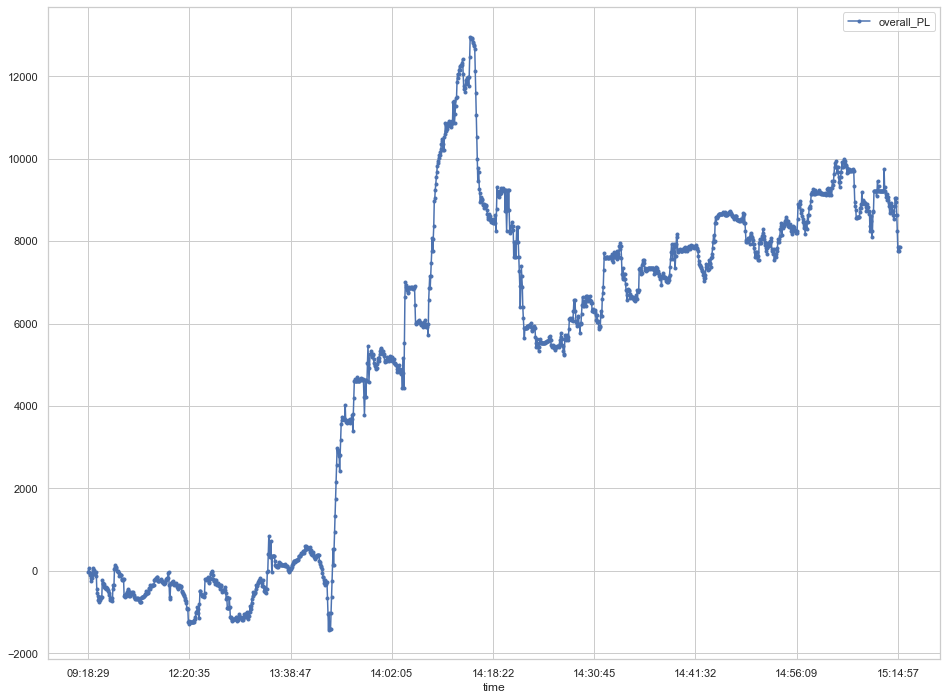

In [40]:
updated_df.plot(x ='time', y='overall_PL', kind = 'line', marker='.' )

now we calculate Maximum Intraday Drawdown (MDD) which is a measure of an asset's largest price drop from a peak to a trough.

In [41]:
MDD = updated_df['overall_PL'].max() - updated_df['overall_PL'].min()

In [42]:
MDD

14389.550000000007

now we will draw chart each timestamp in the prices files of each stock

In [43]:
prices_df

time      symbol     price
0      09:16:00  STOCK_5559  2158.950
1      09:16:00  STOCK_3848  2035.325
2      09:16:00  STOCK_3940  1970.325
3      09:16:00  STOCK_3643  1864.125
4      09:16:00  STOCK_3447  1772.025
...         ...         ...       ...
29729  15:30:00  STOCK_4450  1078.400
29730  15:30:00  STOCK_3138  1172.000
29731  15:30:00  STOCK_5651  1272.000
29732  15:30:00  STOCK_5998  1372.000
29733  15:30:00  STOCK_4198  1472.000

[29734 rows x 3 columns]

In [44]:
num_stocks_prices

array(['STOCK_3130', 'STOCK_3138', 'STOCK_3140', 'STOCK_3177',
       'STOCK_3213', 'STOCK_3228', 'STOCK_3245', 'STOCK_3311',
       'STOCK_3337', 'STOCK_3365', 'STOCK_3401', 'STOCK_3415',
       'STOCK_3439', 'STOCK_3447', 'STOCK_3561', 'STOCK_3584',
       'STOCK_3643', 'STOCK_3660', 'STOCK_3666', 'STOCK_3682',
       'STOCK_3683', 'STOCK_3824', 'STOCK_3848', 'STOCK_3870',
       'STOCK_3887', 'STOCK_3896', 'STOCK_3940', 'STOCK_3954',
       'STOCK_3979', 'STOCK_4060', 'STOCK_4063', 'STOCK_4073',
       'STOCK_4127', 'STOCK_4137', 'STOCK_4144', 'STOCK_4146',
       'STOCK_4154', 'STOCK_4198', 'STOCK_4239', 'STOCK_4310',
       'STOCK_4381', 'STOCK_4427', 'STOCK_4441', 'STOCK_4450',
       'STOCK_4487', 'STOCK_4518', 'STOCK_4548', 'STOCK_4580',
       'STOCK_4583', 'STOCK_4688', 'STOCK_4699', 'STOCK_4731',
       'STOCK_4771', 'STOCK_4781', 'STOCK_4783', 'STOCK_4890',
       'STOCK_4917', 'STOCK_4935', 'STOCK_4949', 'STOCK_4989',
       'STOCK_4993', 'STOCK_5047', 'STOCK_5050', 'STOCK

In [45]:
part_stock = prices_df[prices_df['symbol']=="STOCK_5904"]
part_stock.head()

time      symbol   price
27   09:16:00  STOCK_5904  19.950
107  09:17:00  STOCK_5904  11.875
187  09:18:00  STOCK_5904  14.400
267  09:19:00  STOCK_5904  12.900
347  09:20:00  STOCK_5904  13.225

Chart for each stock

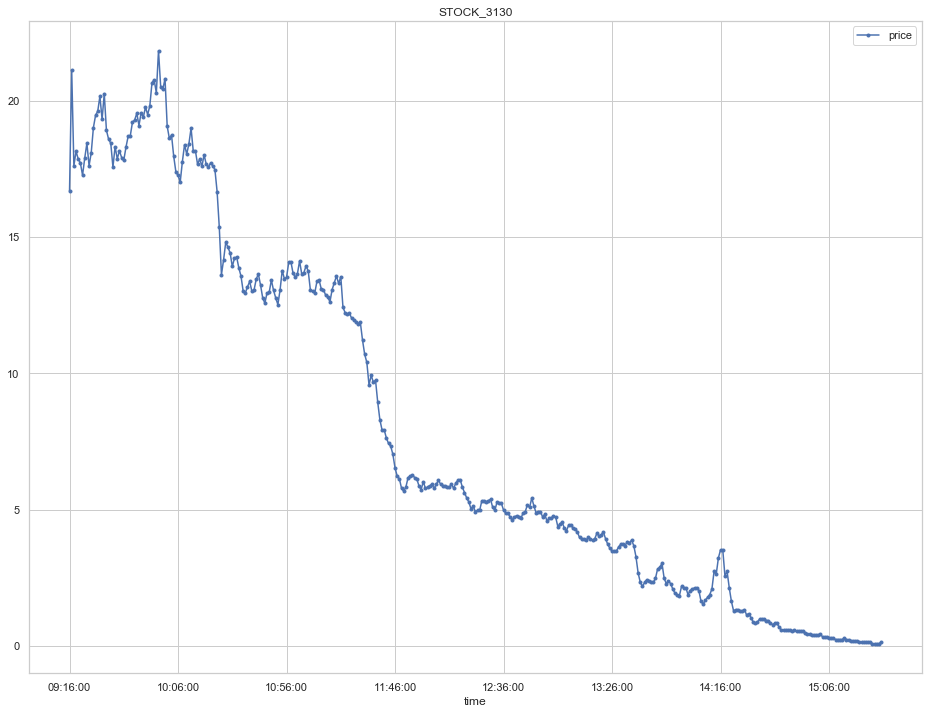

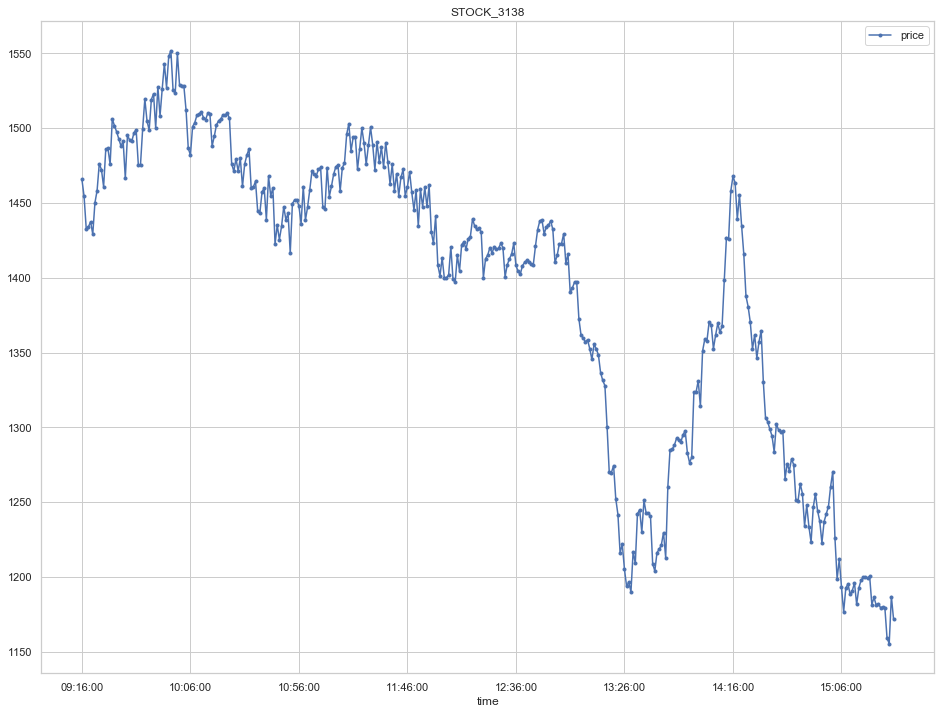

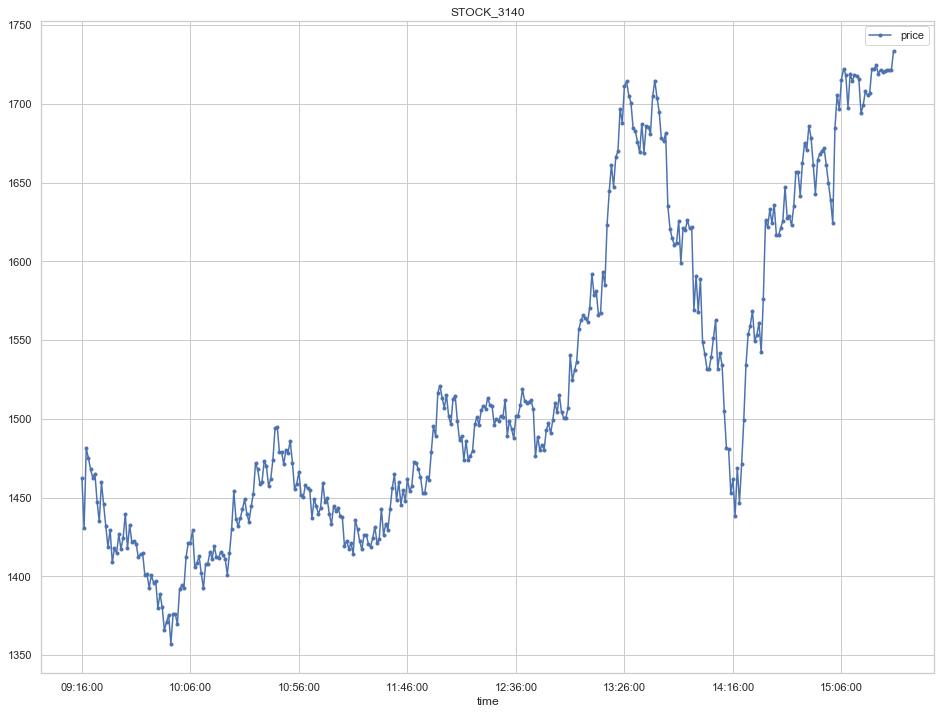

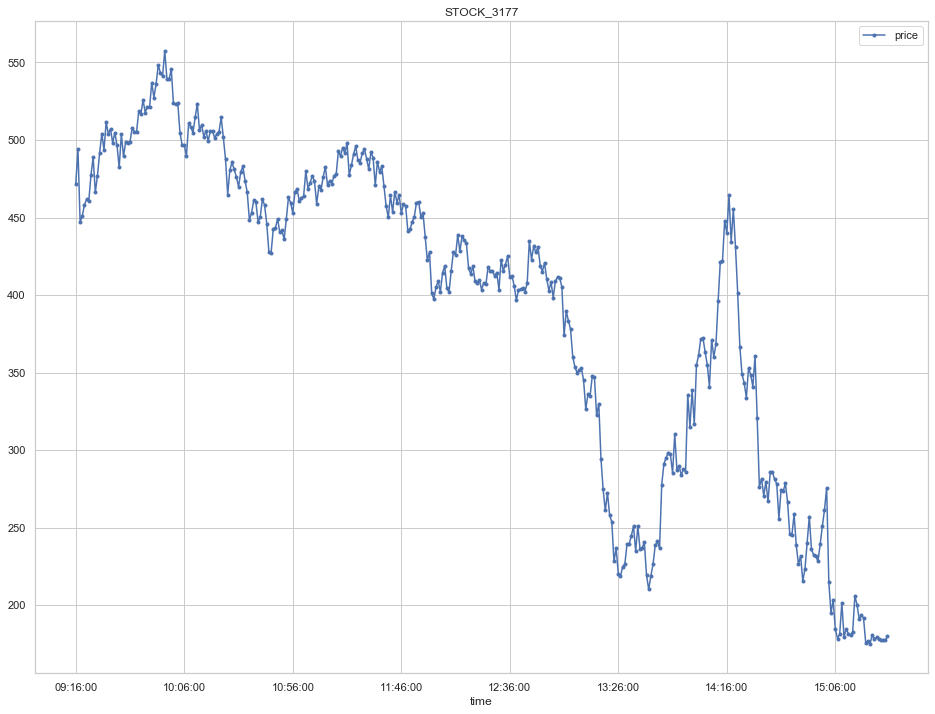

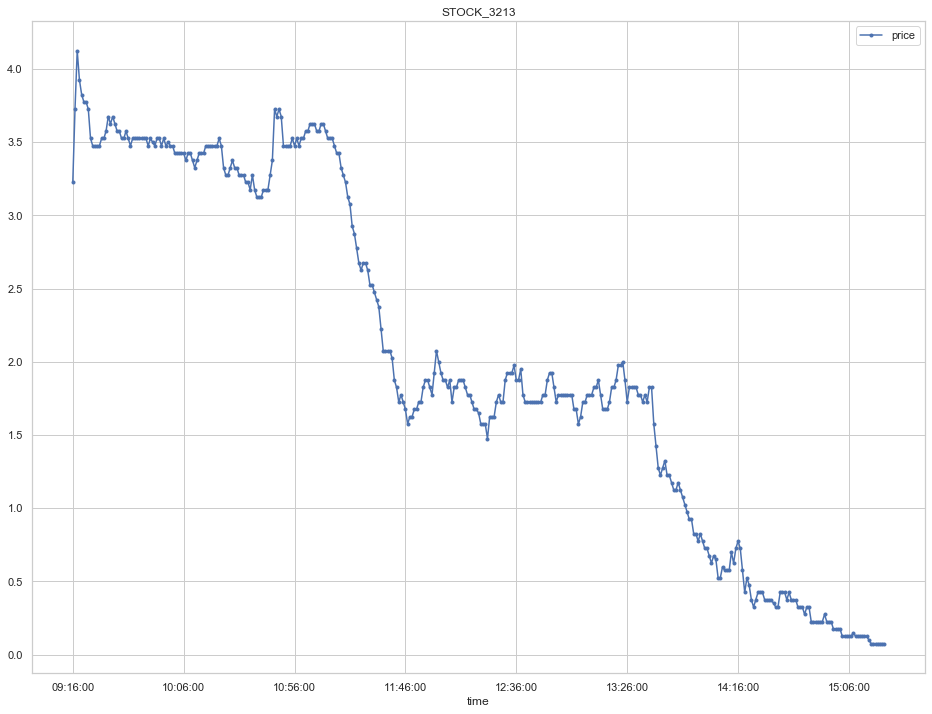

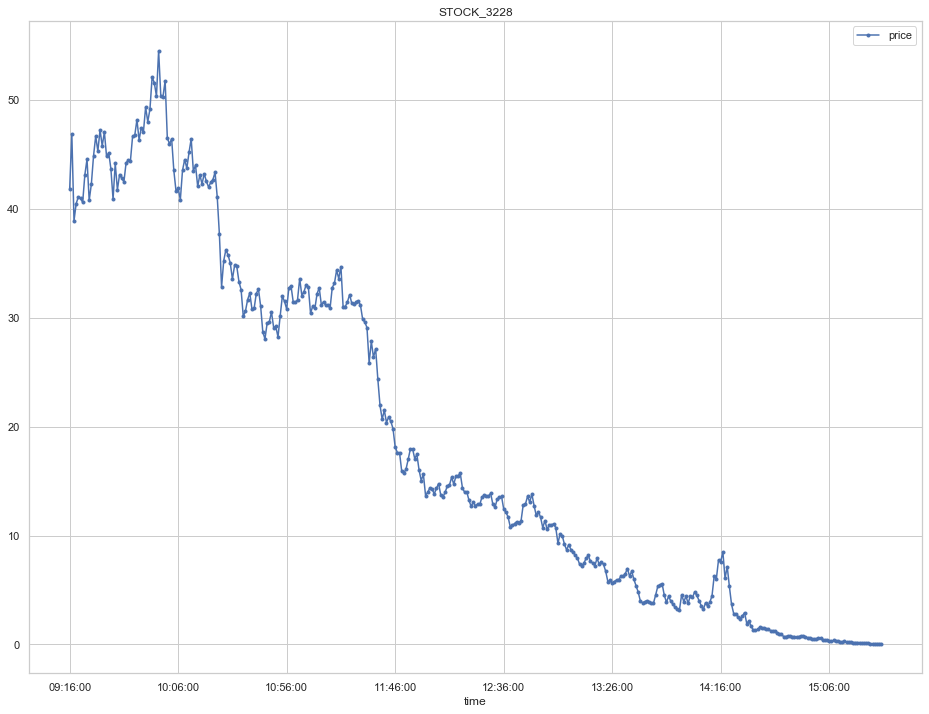

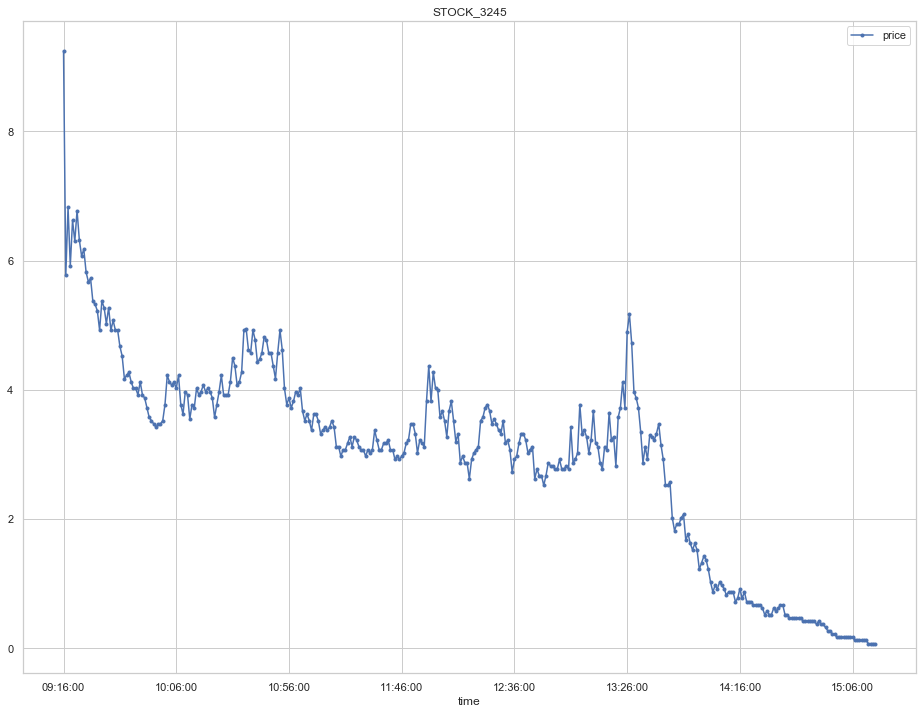

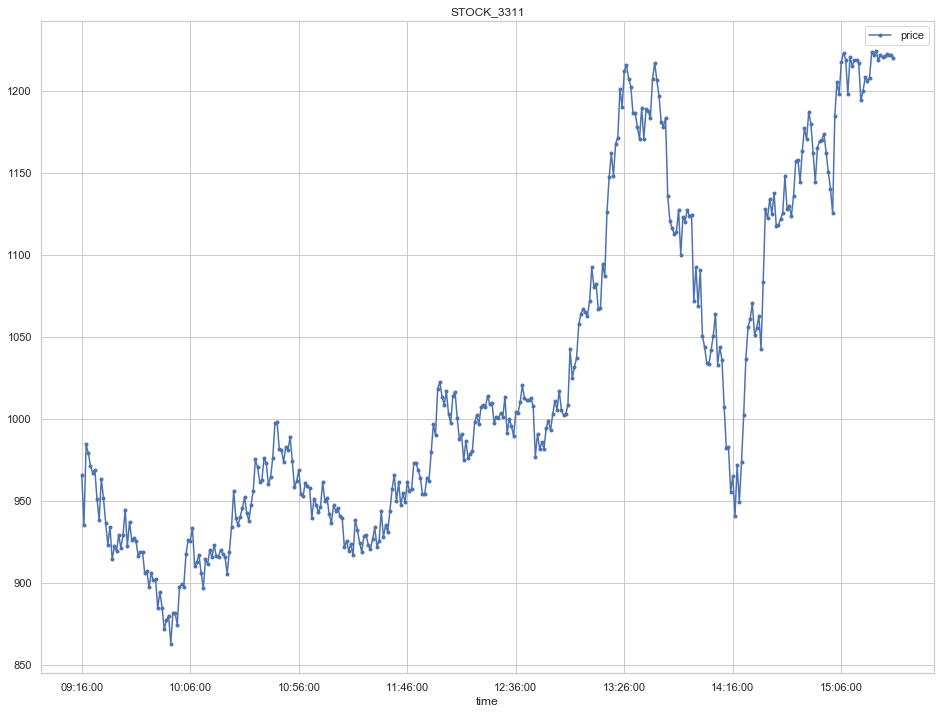

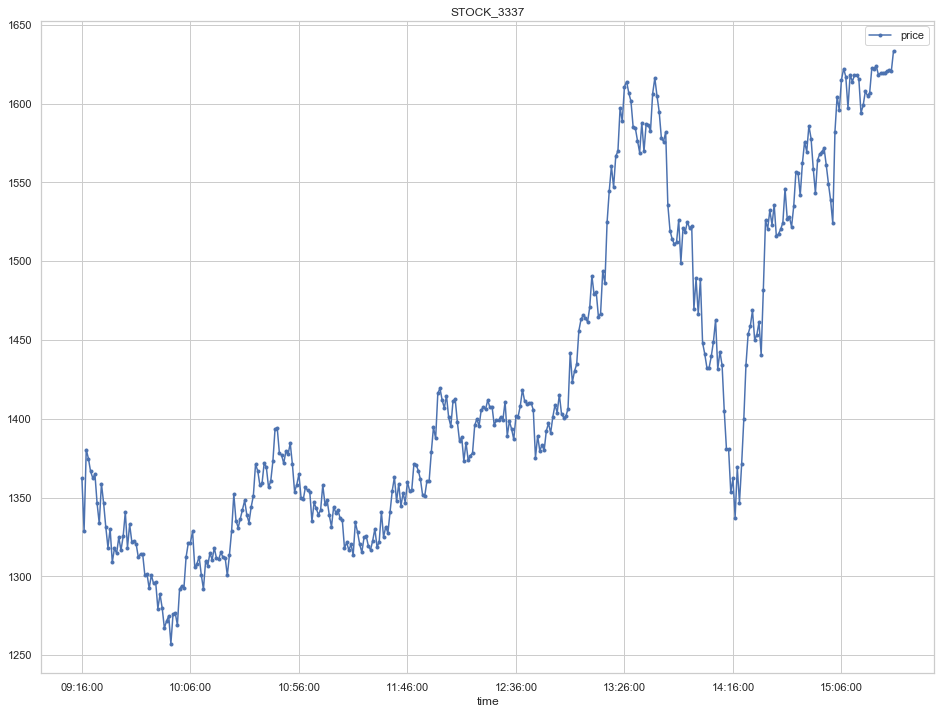

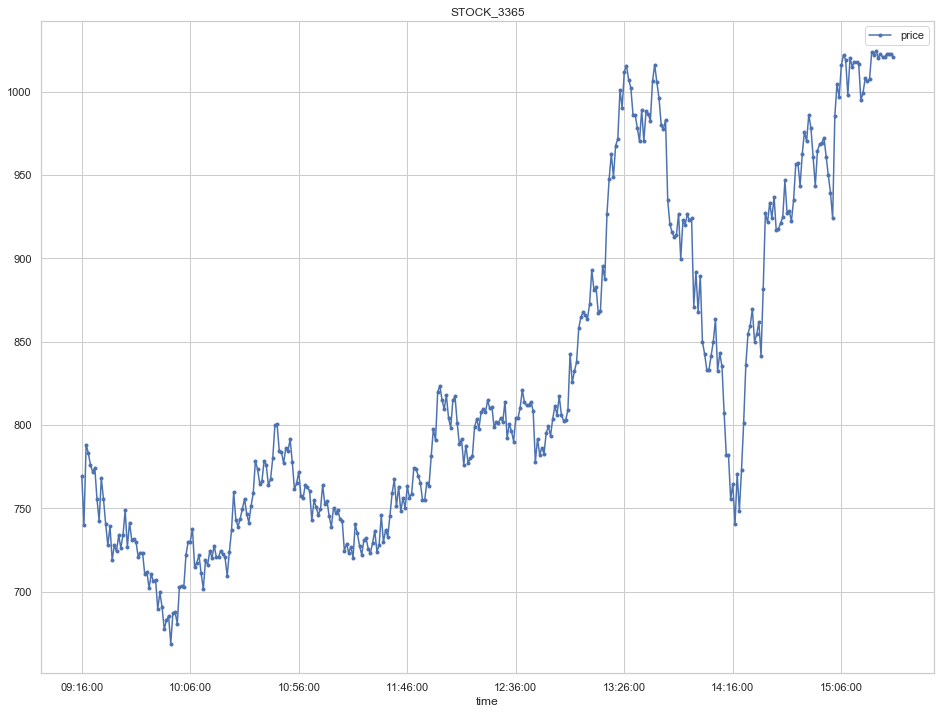

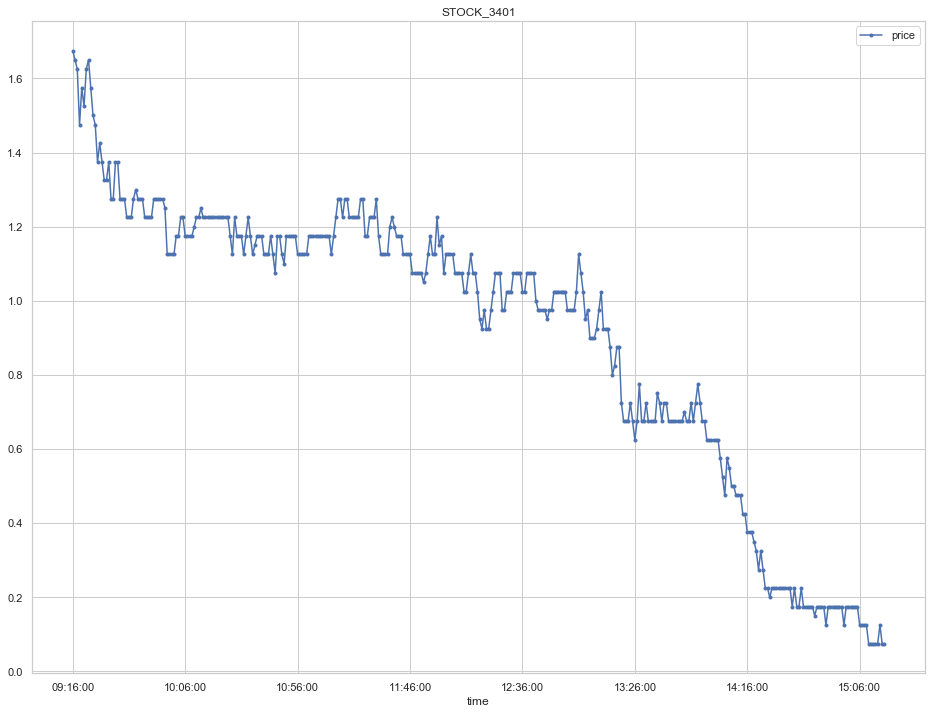

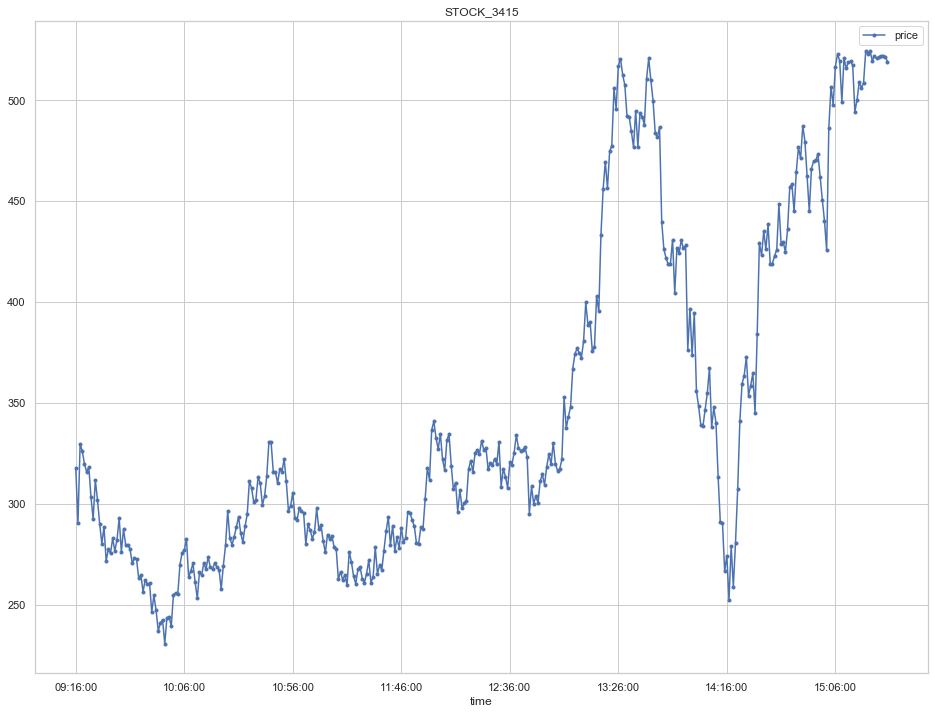

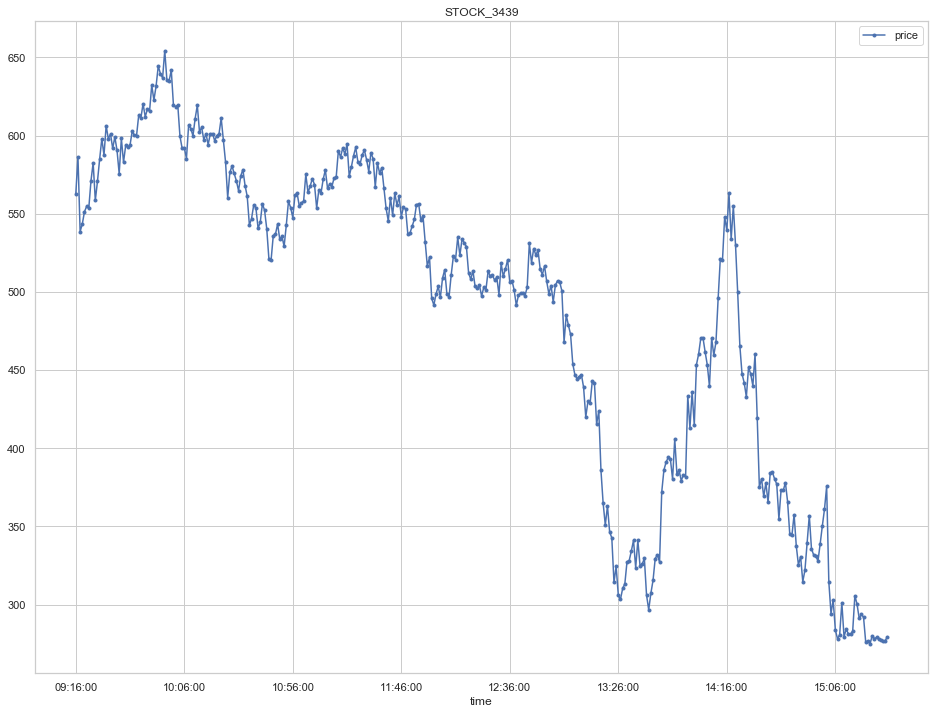

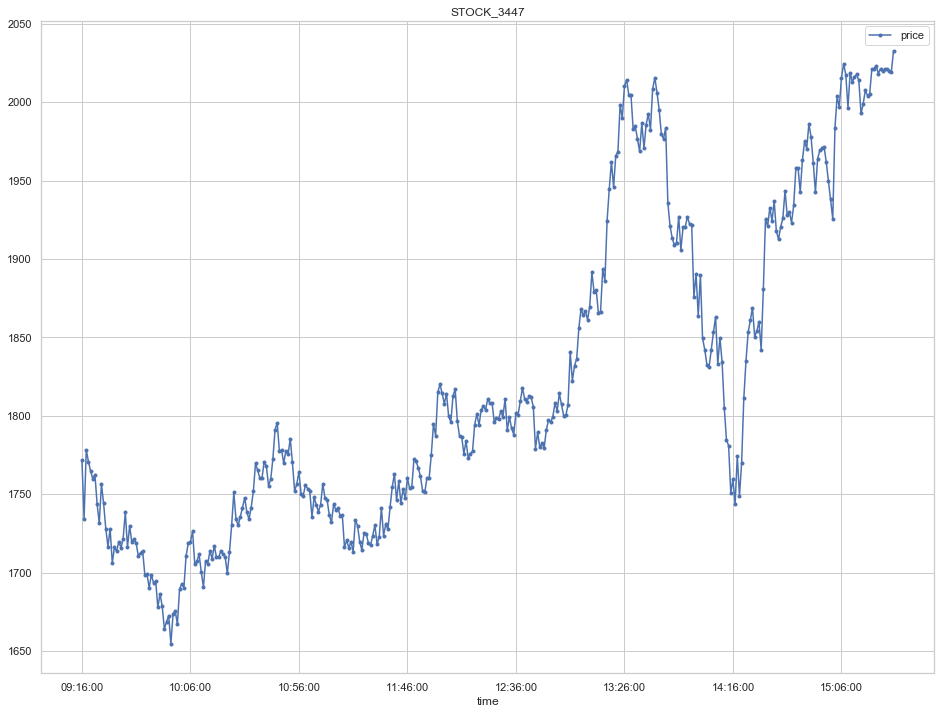

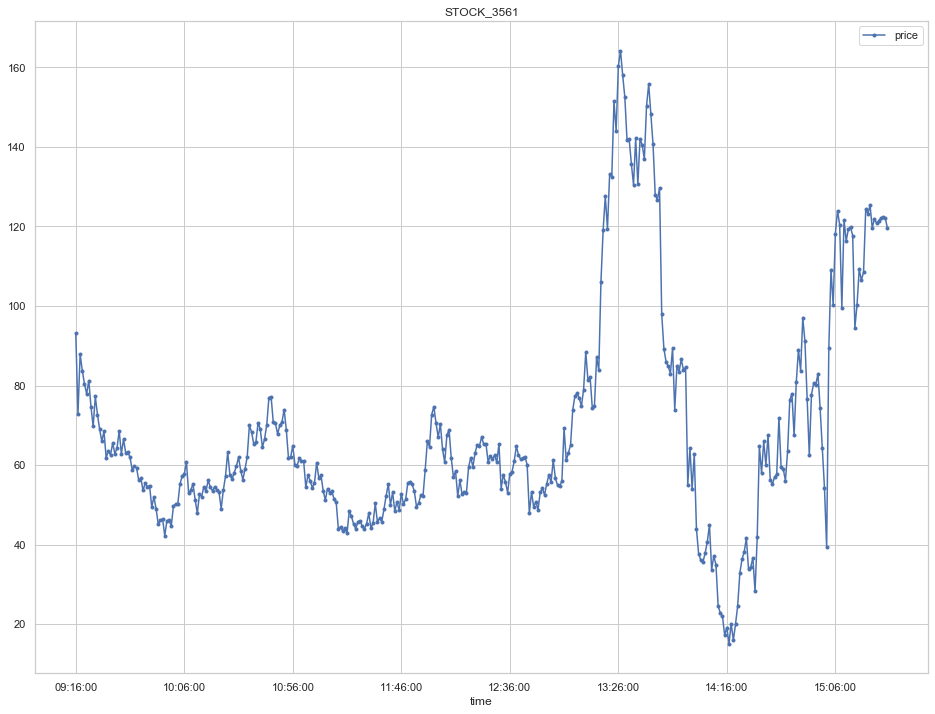

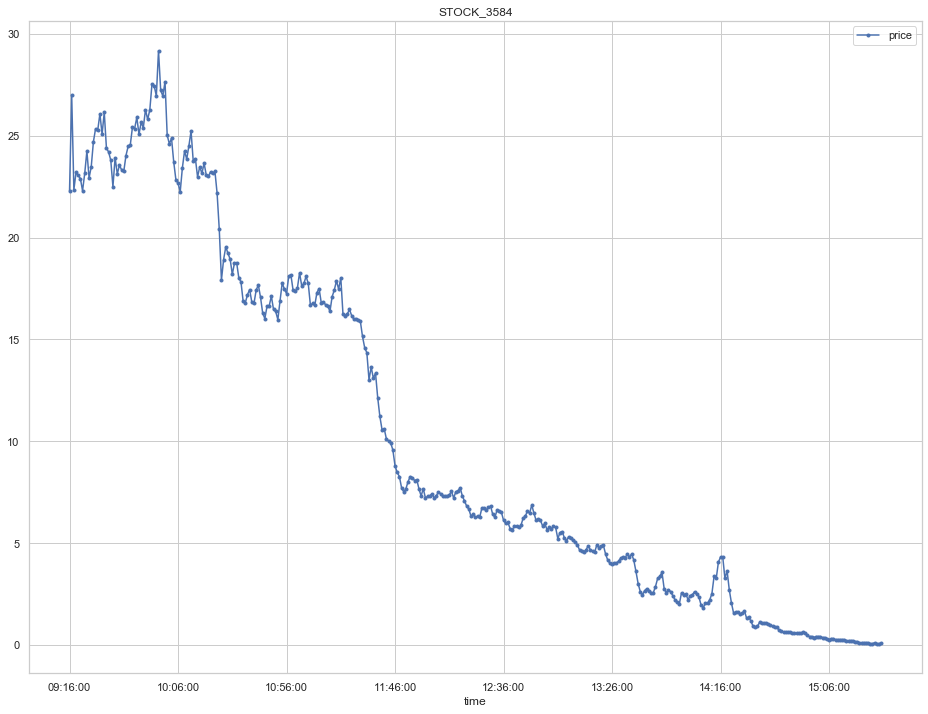

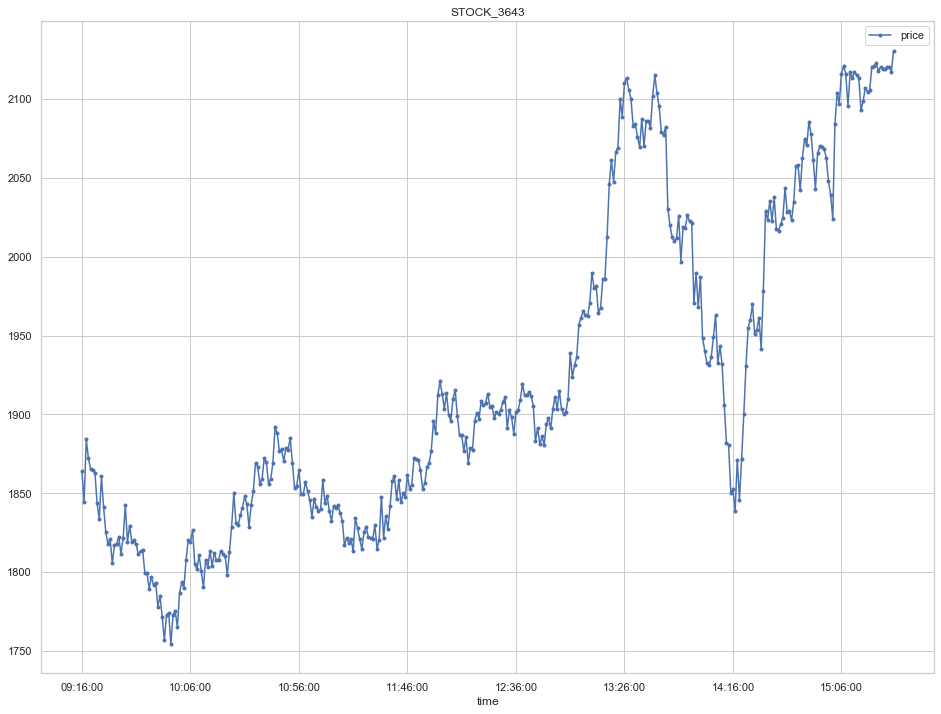

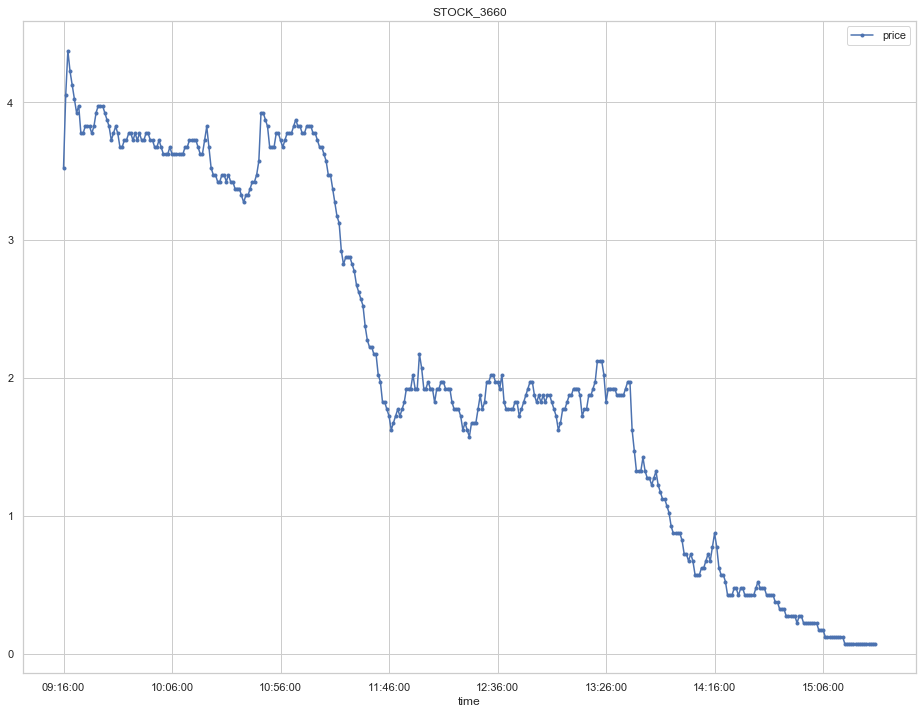

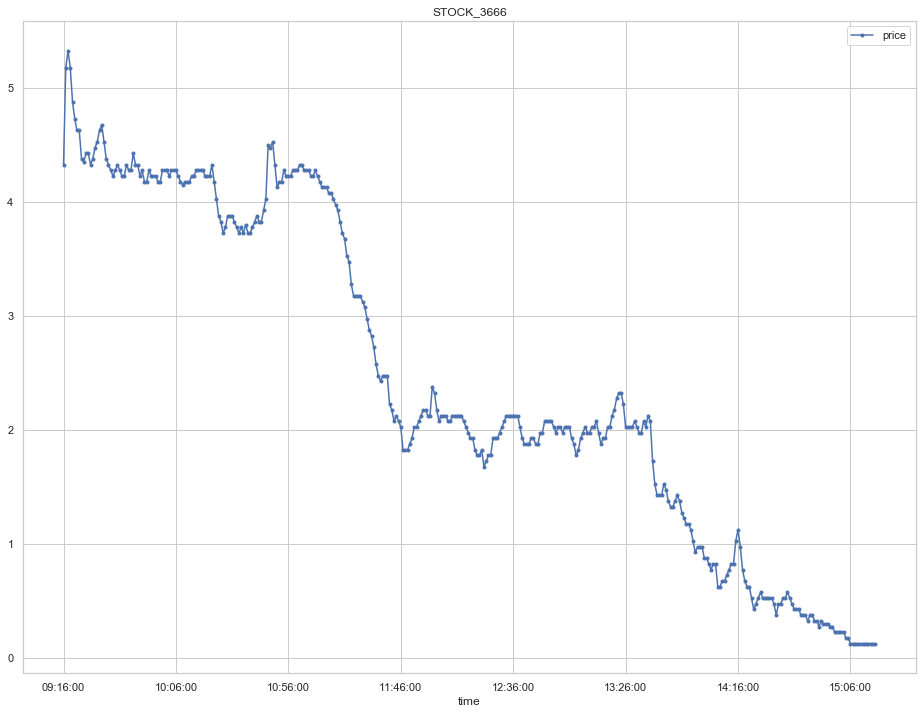

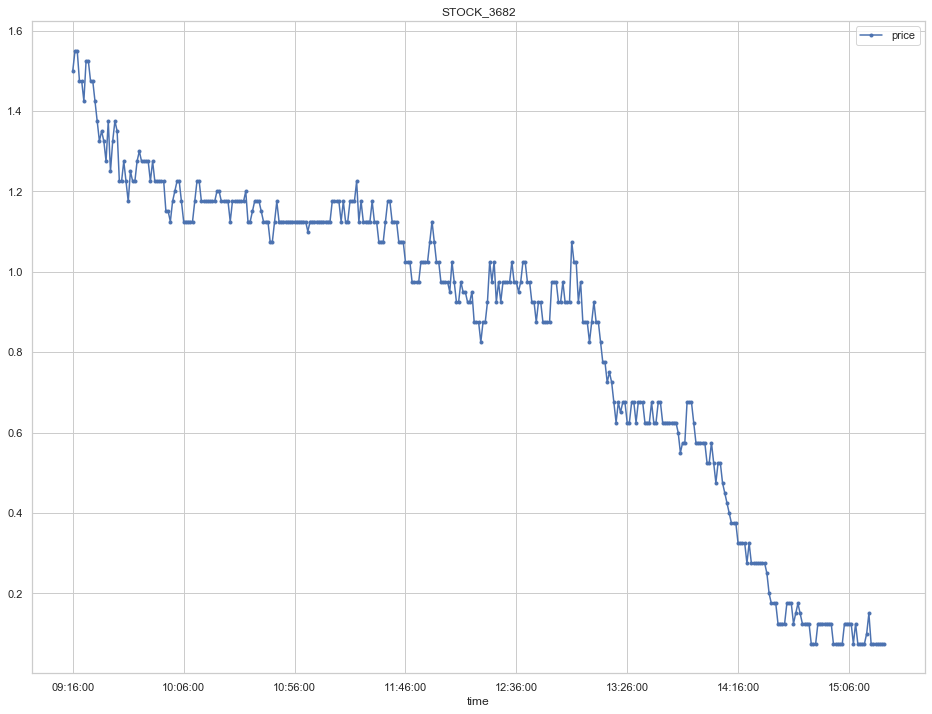

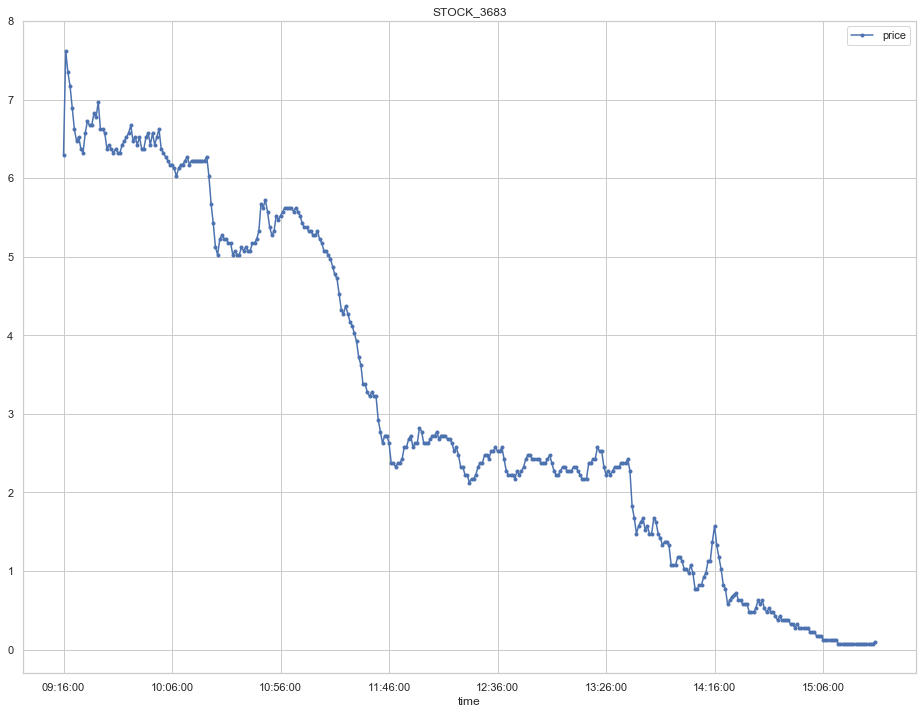

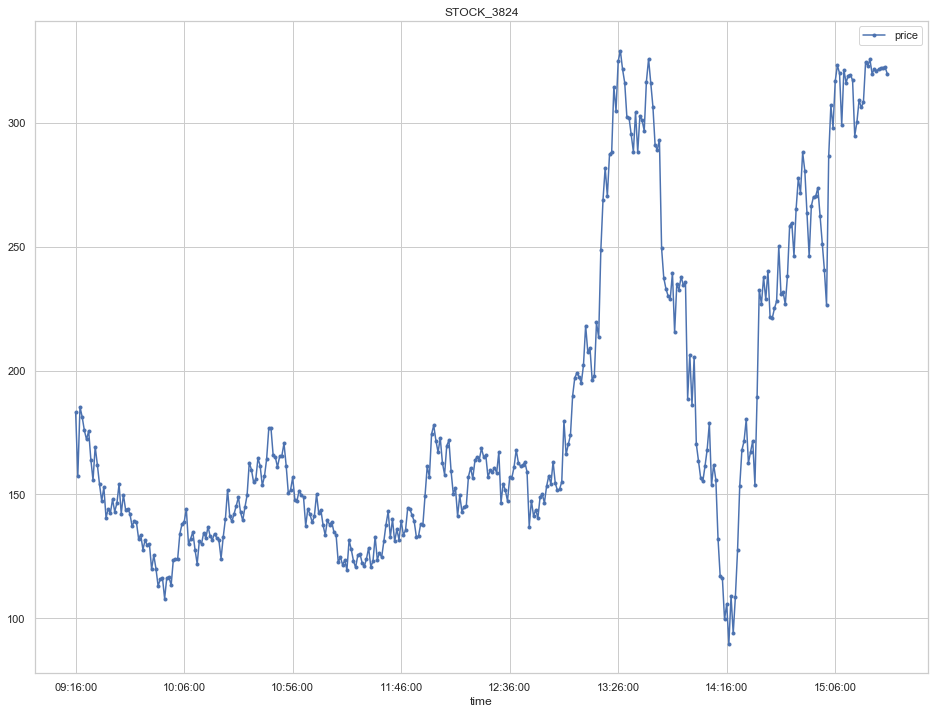

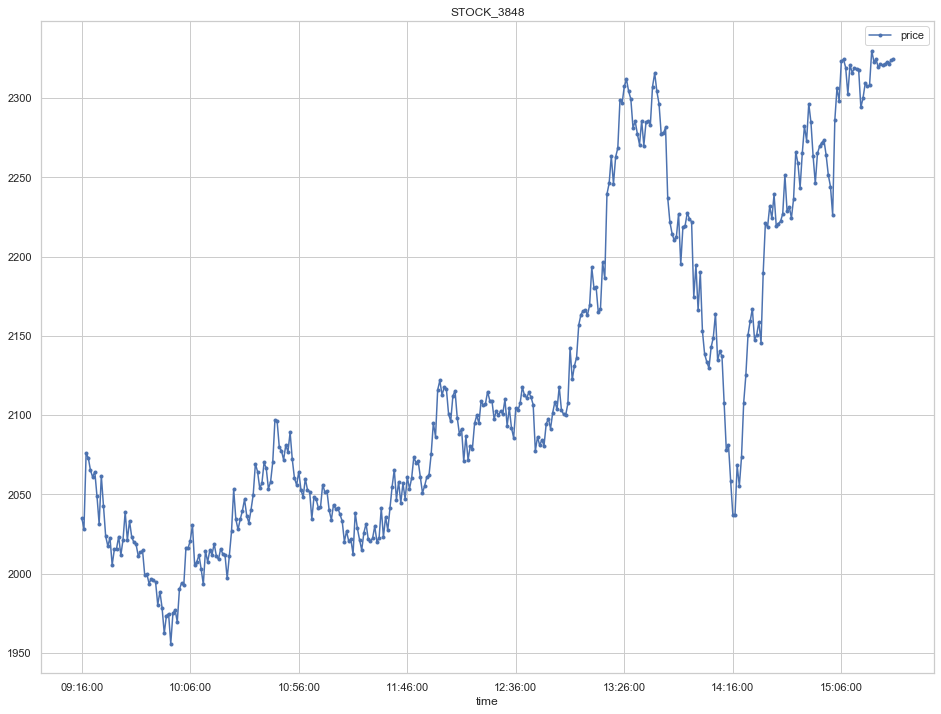

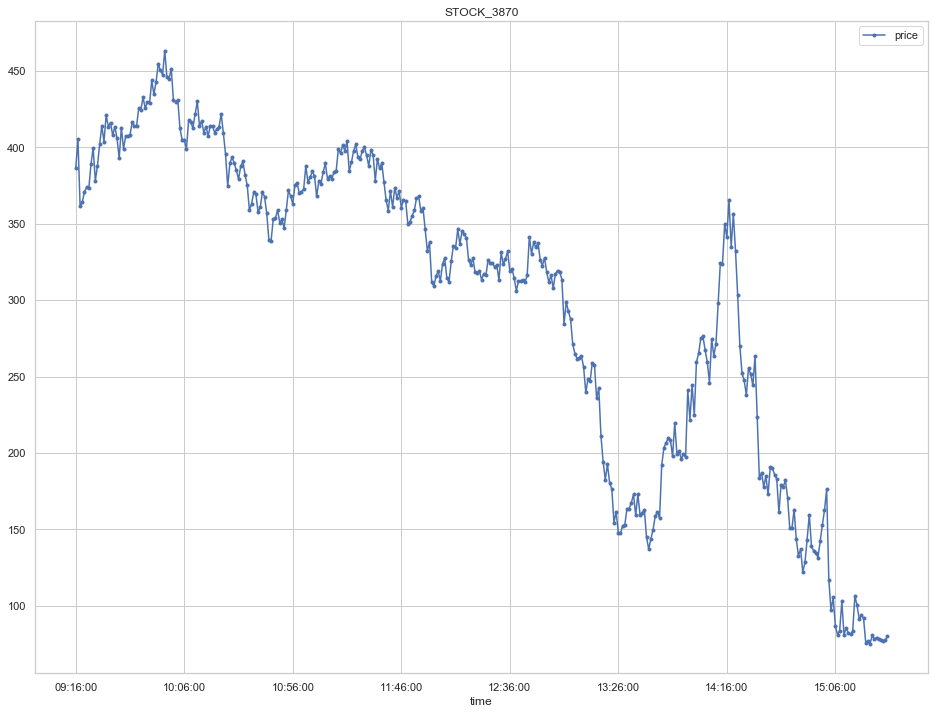

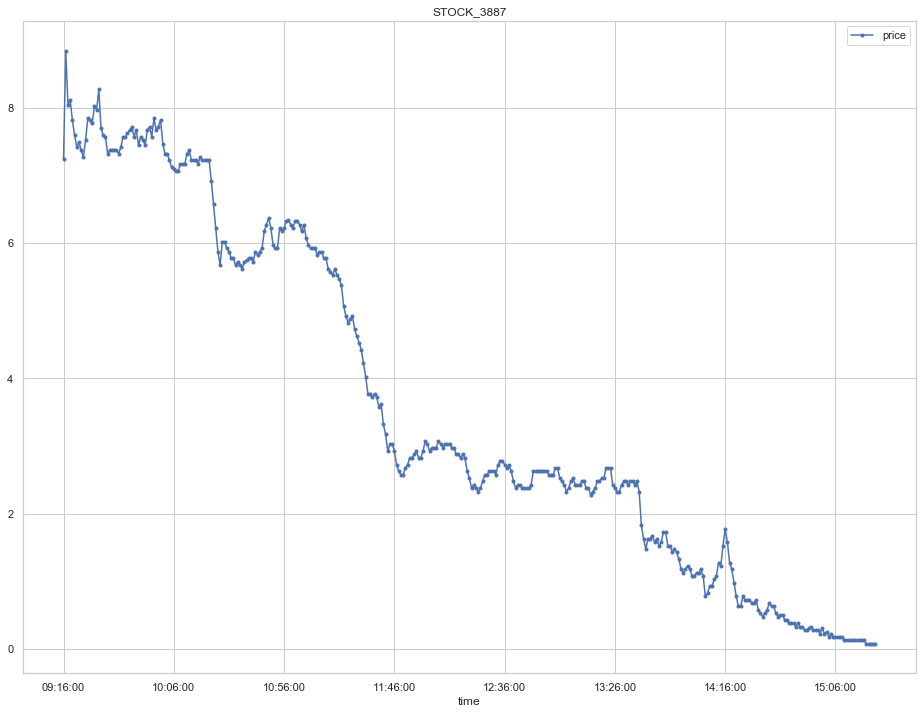

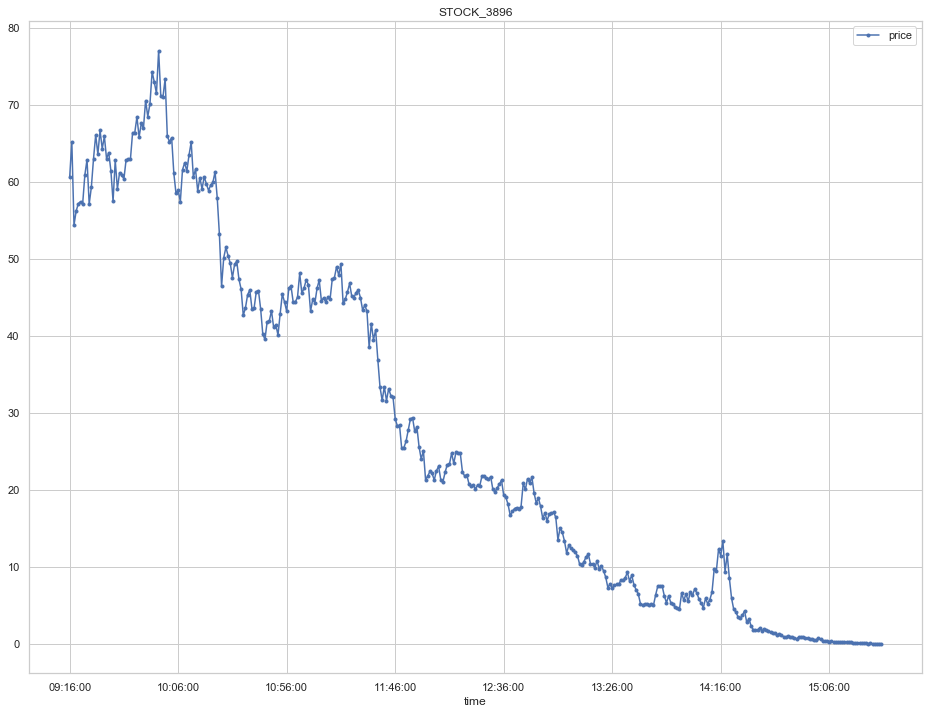

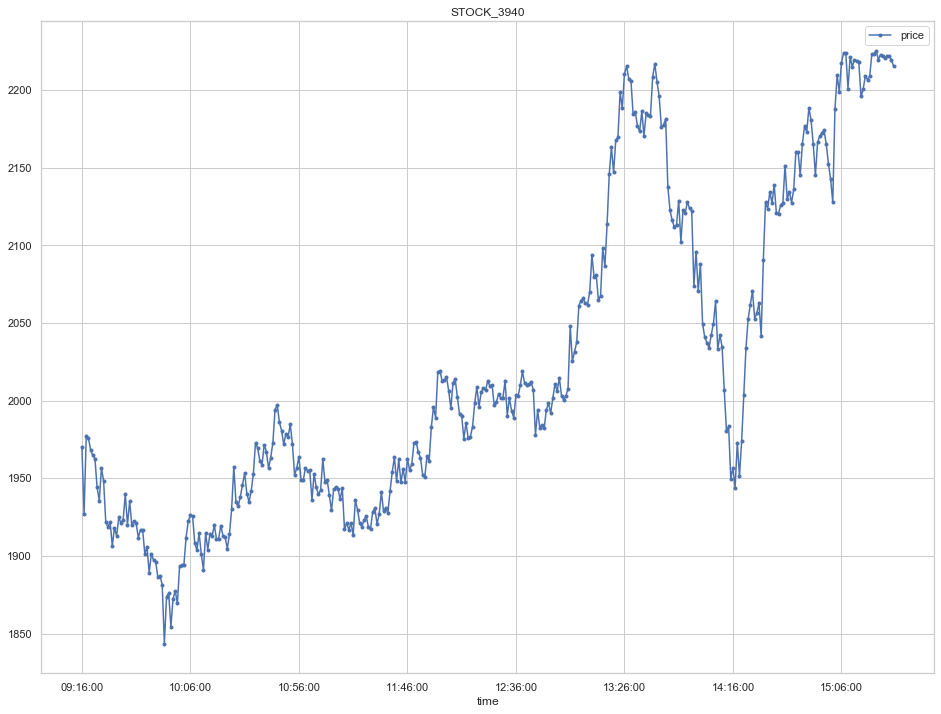

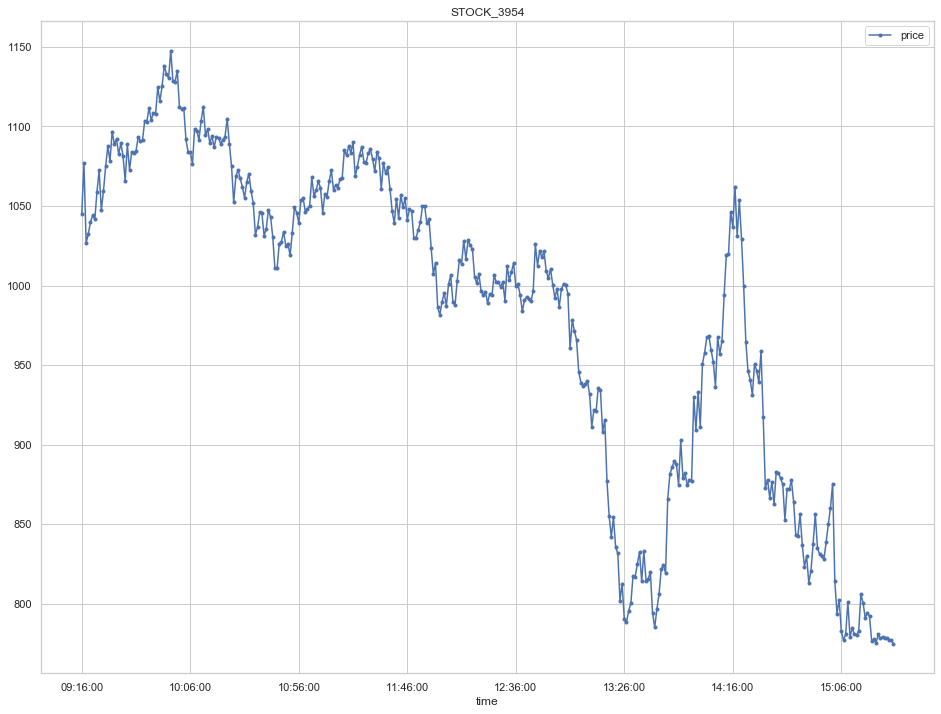

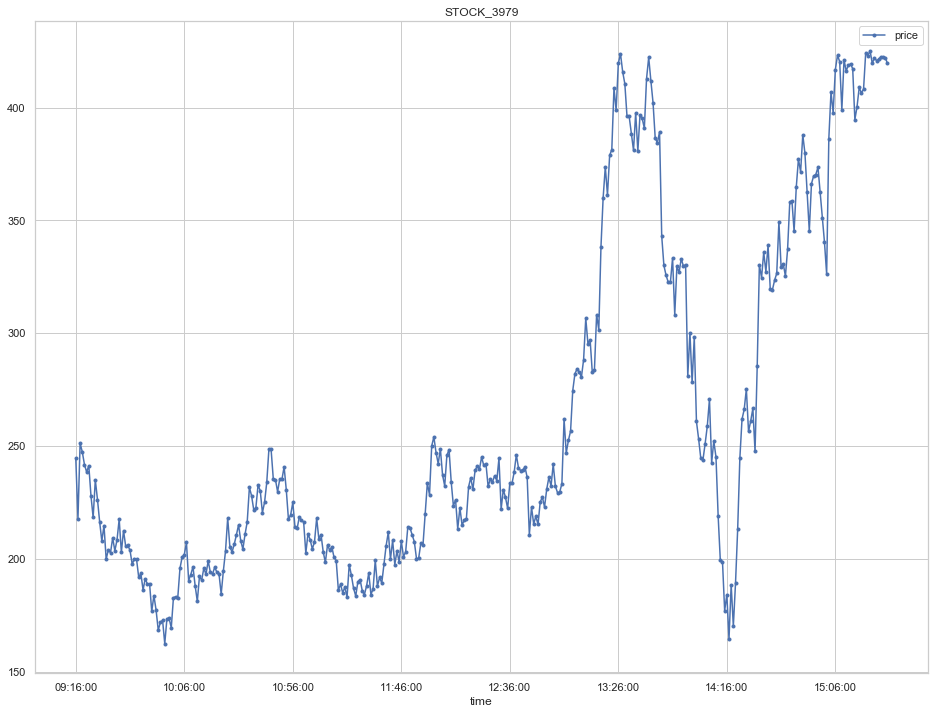

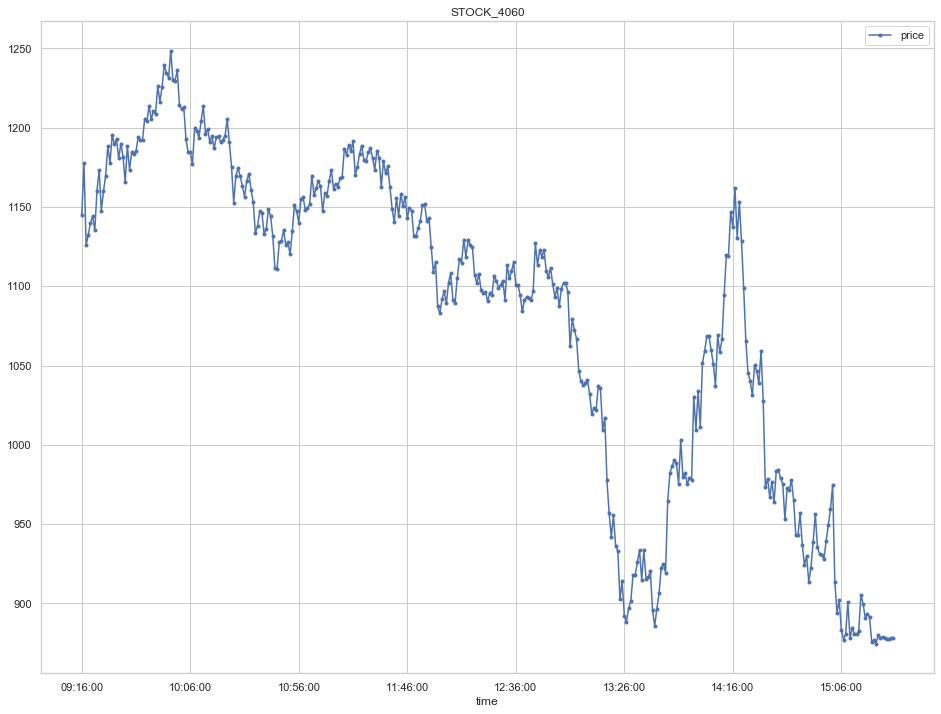

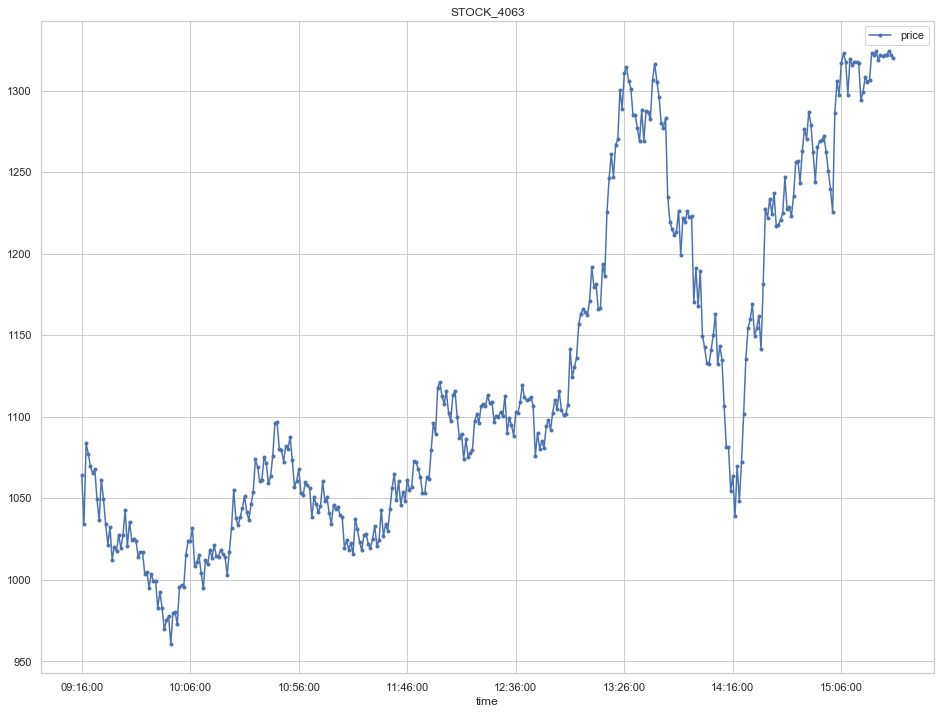

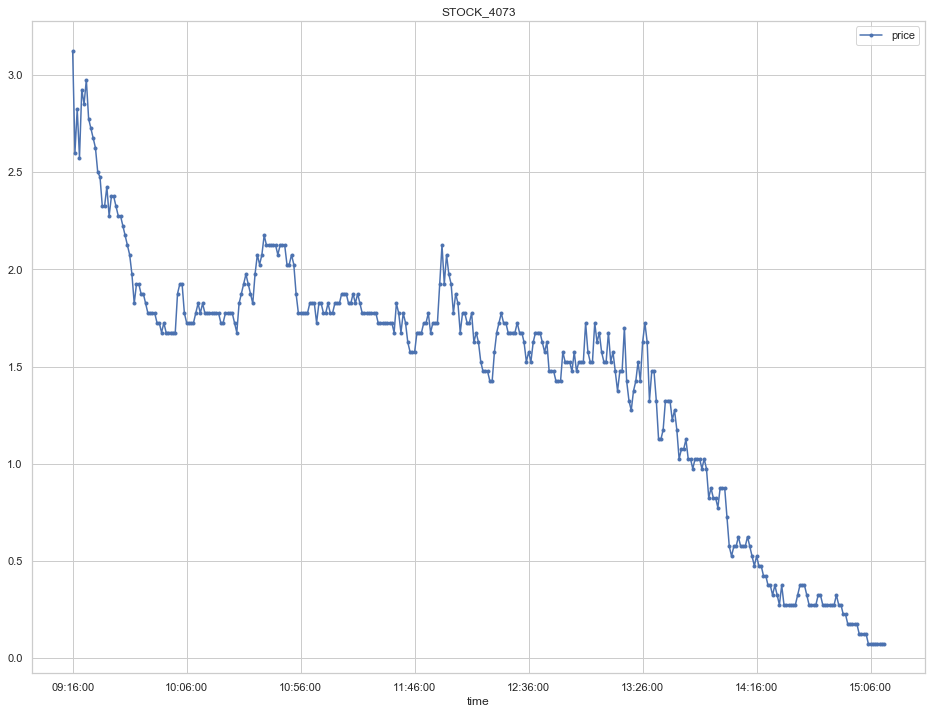

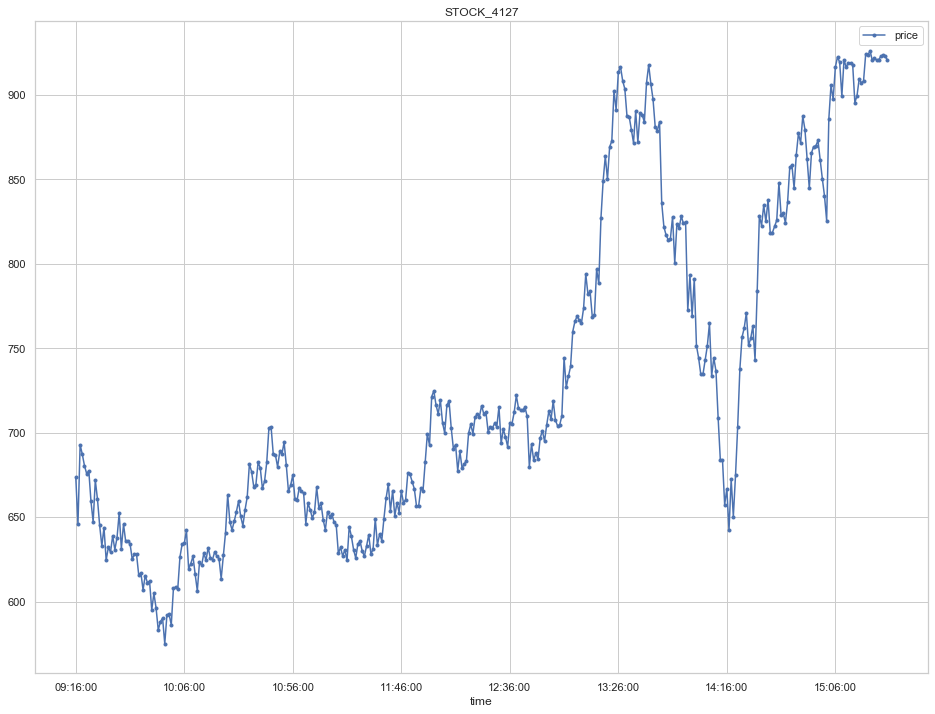

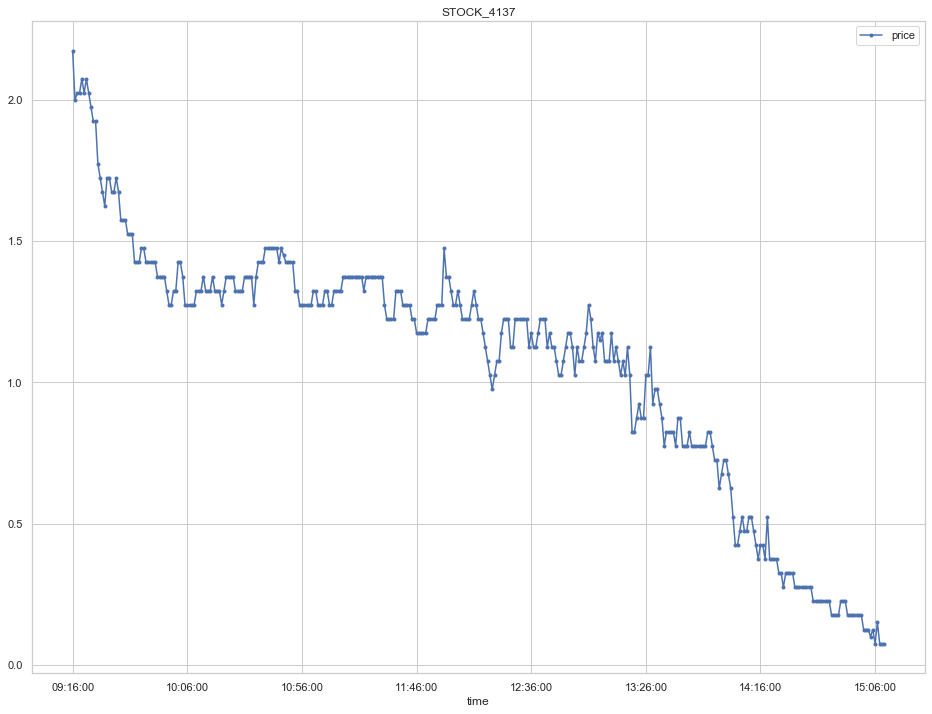

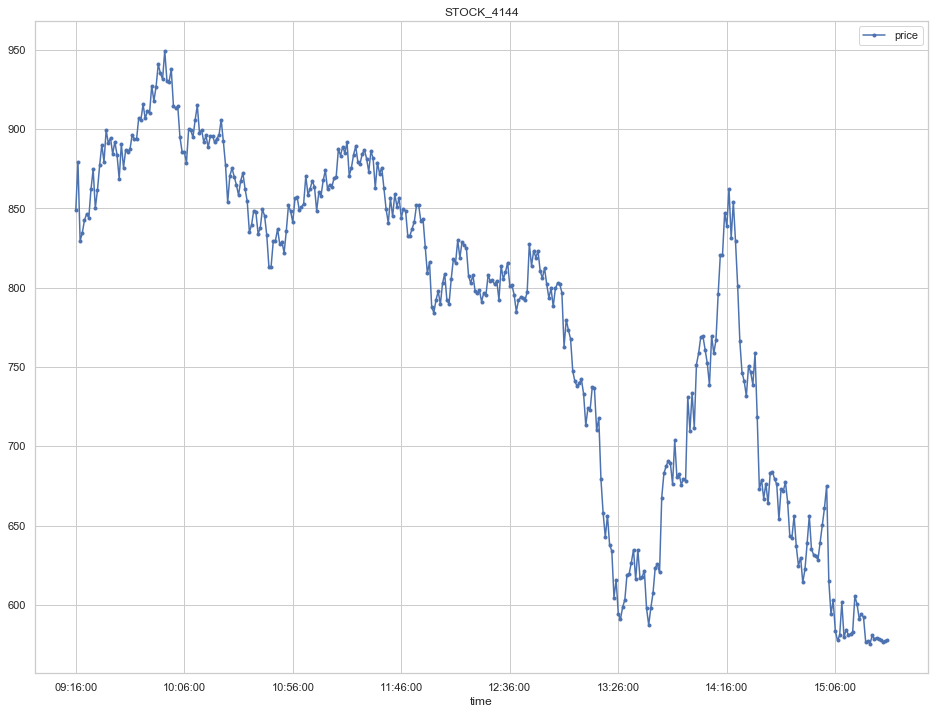

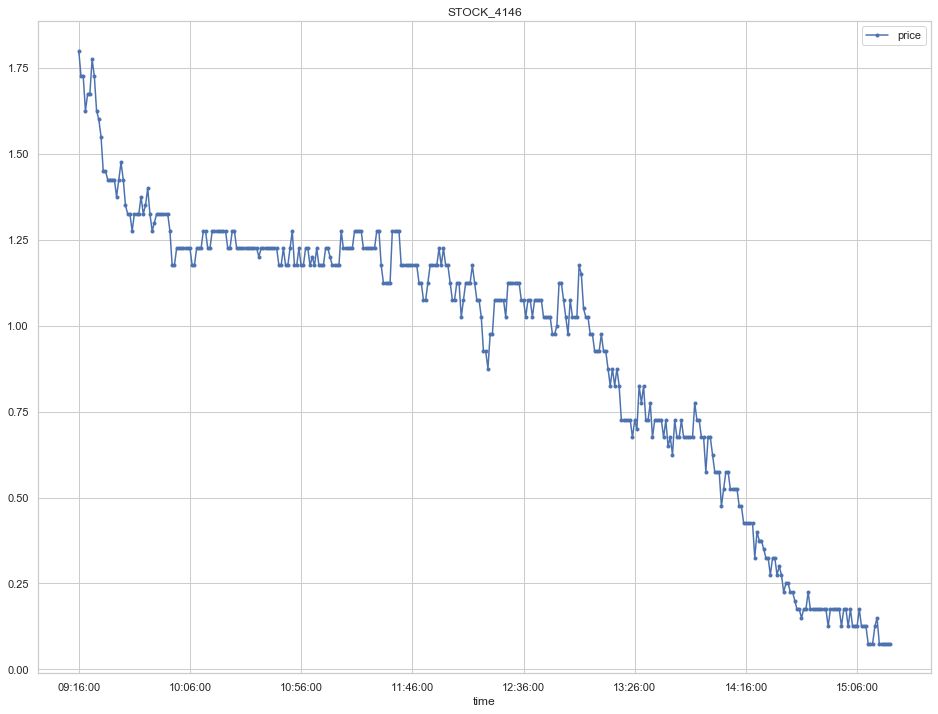

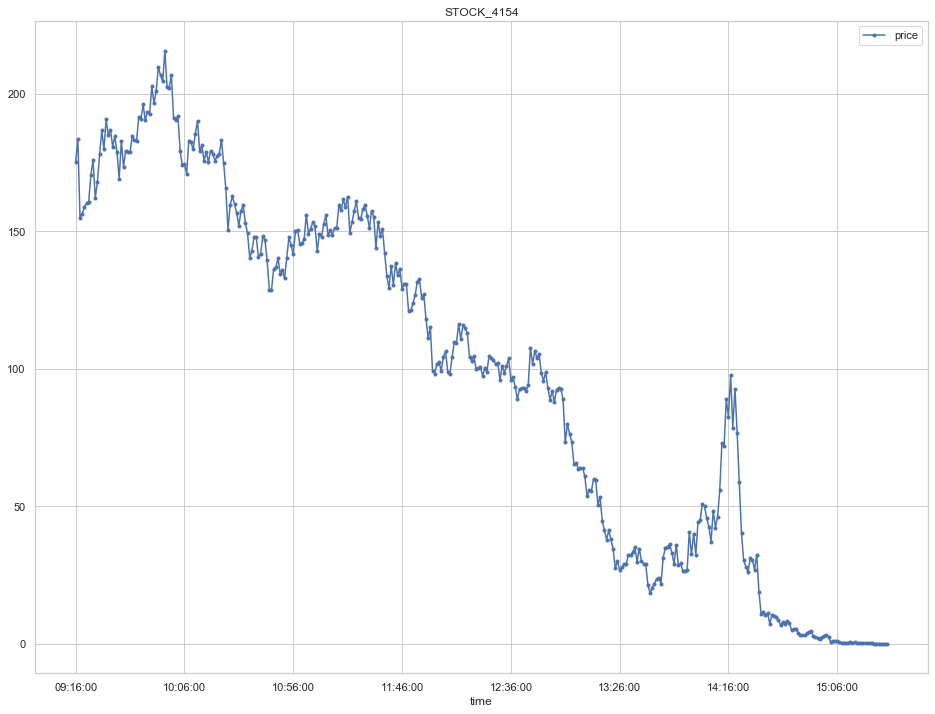

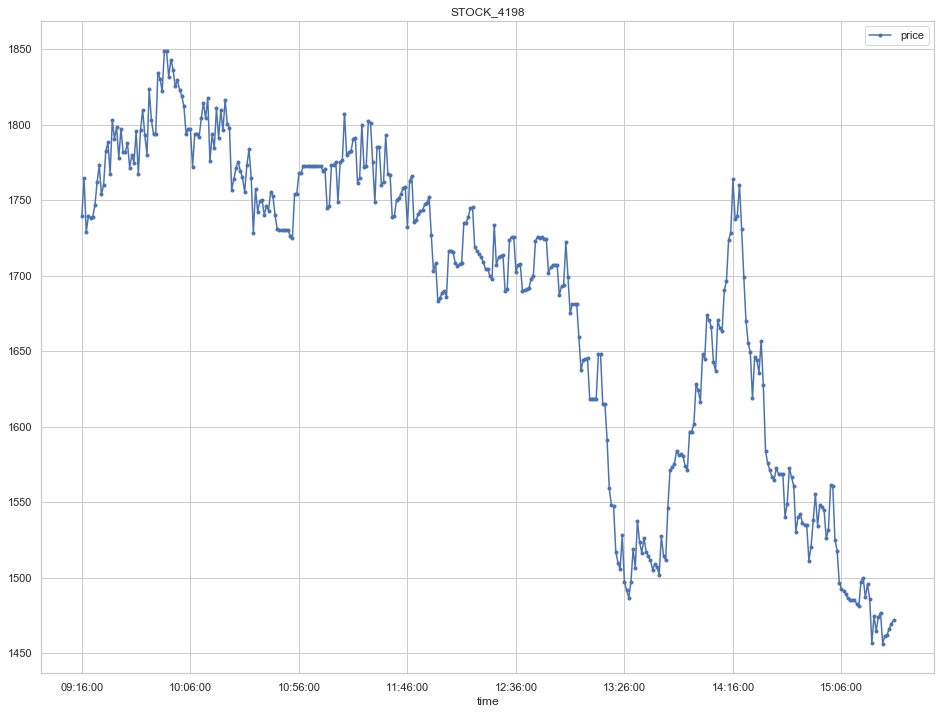

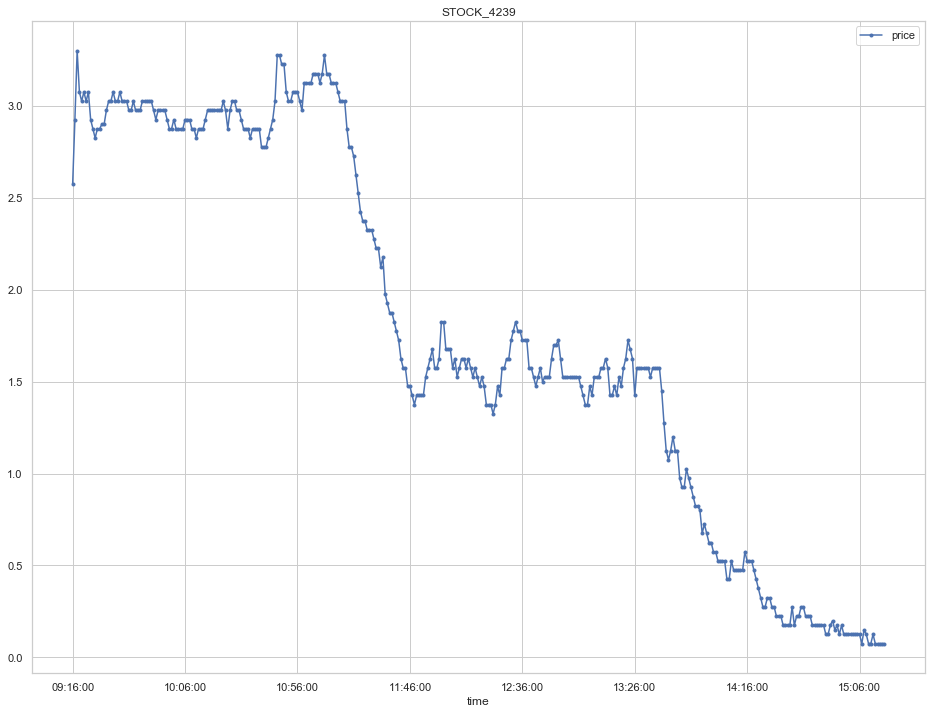

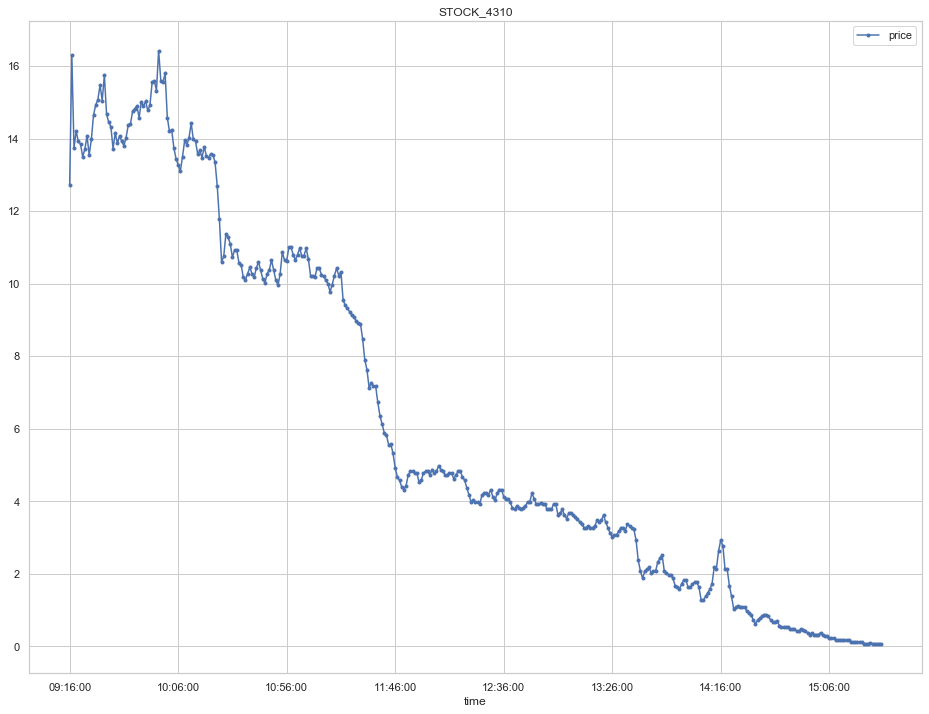

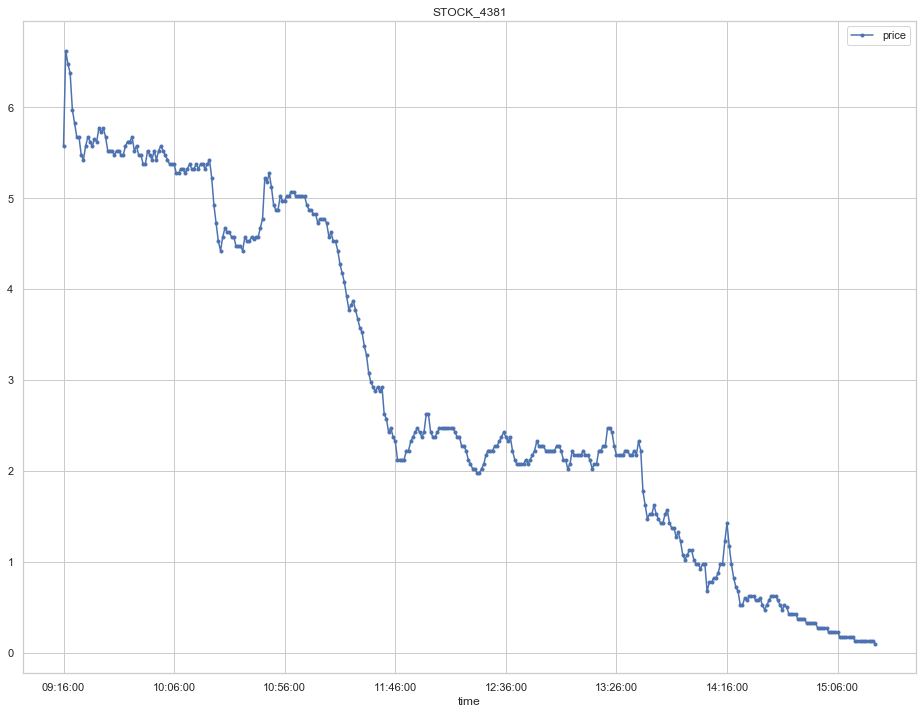

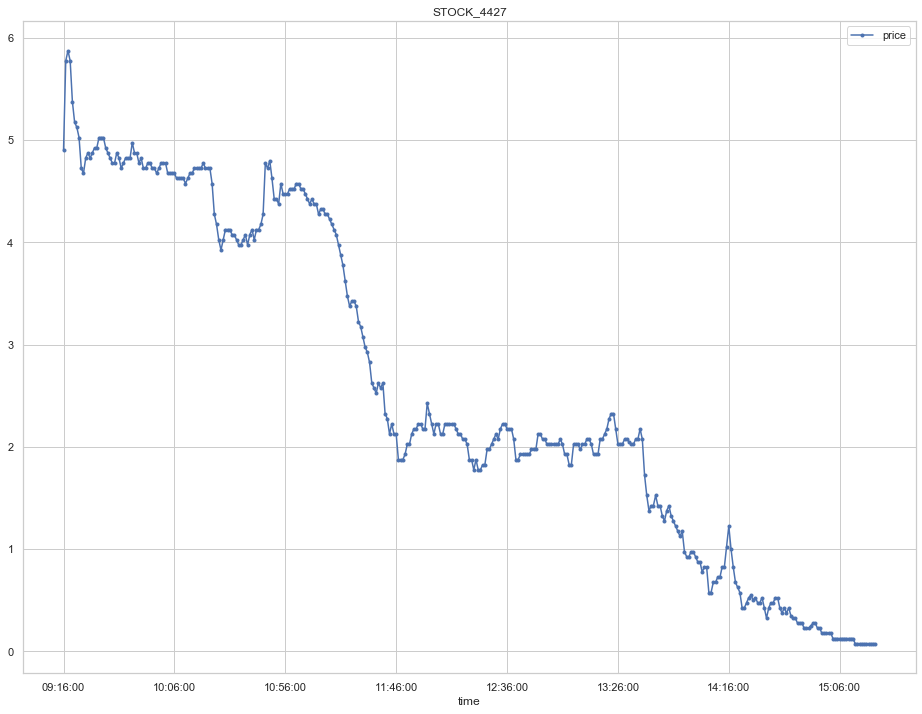

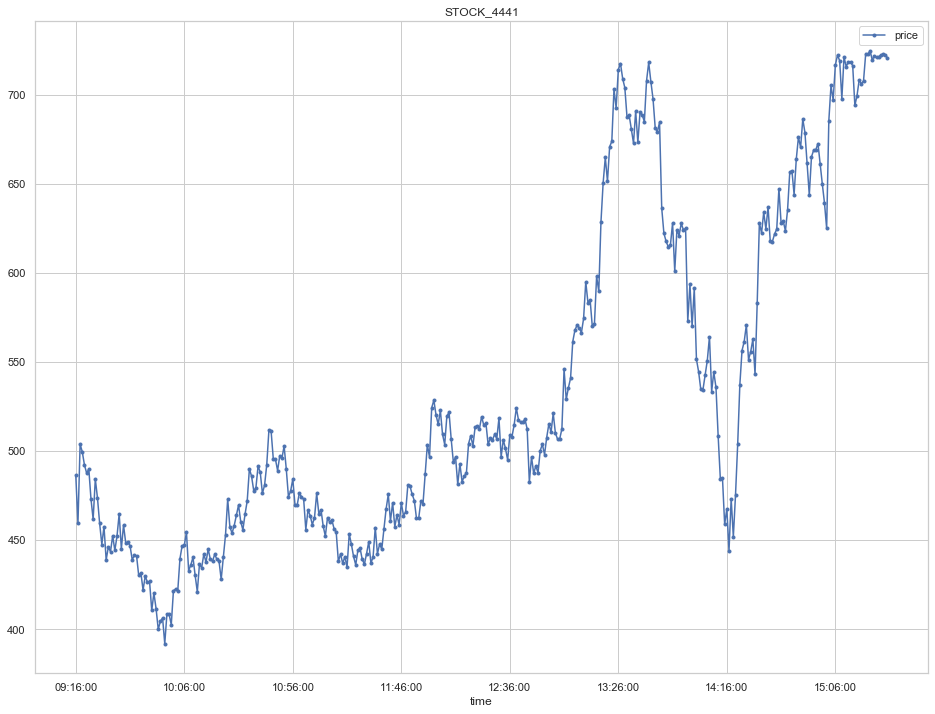

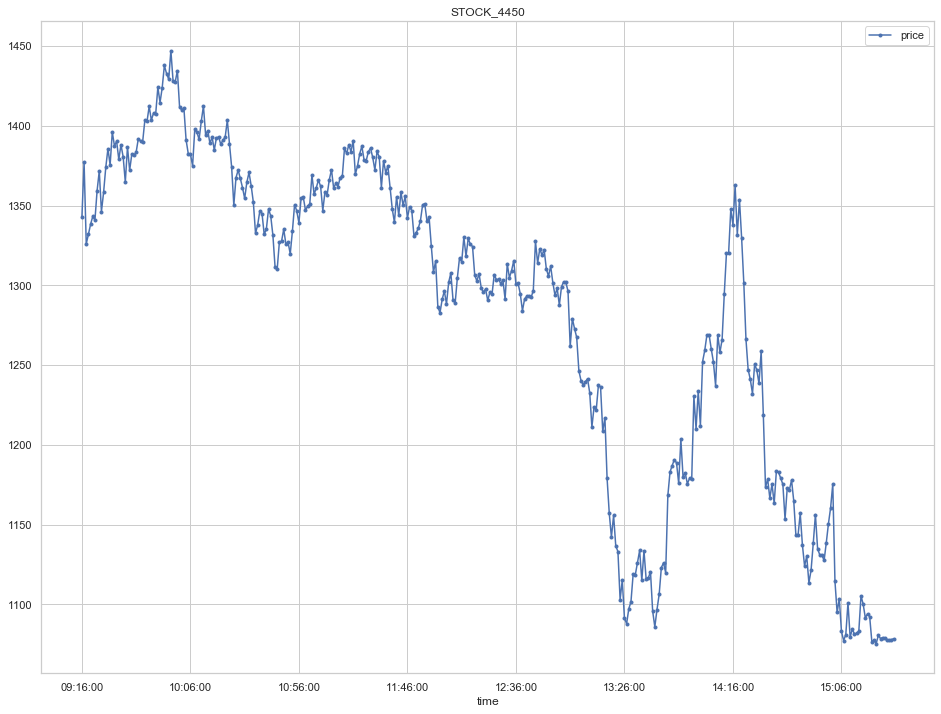

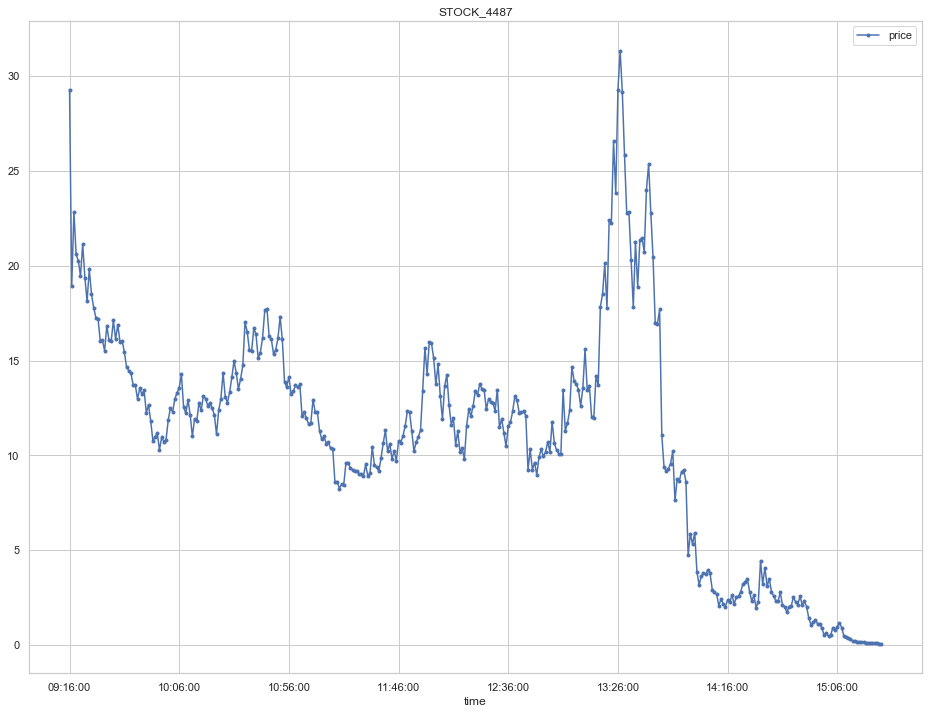

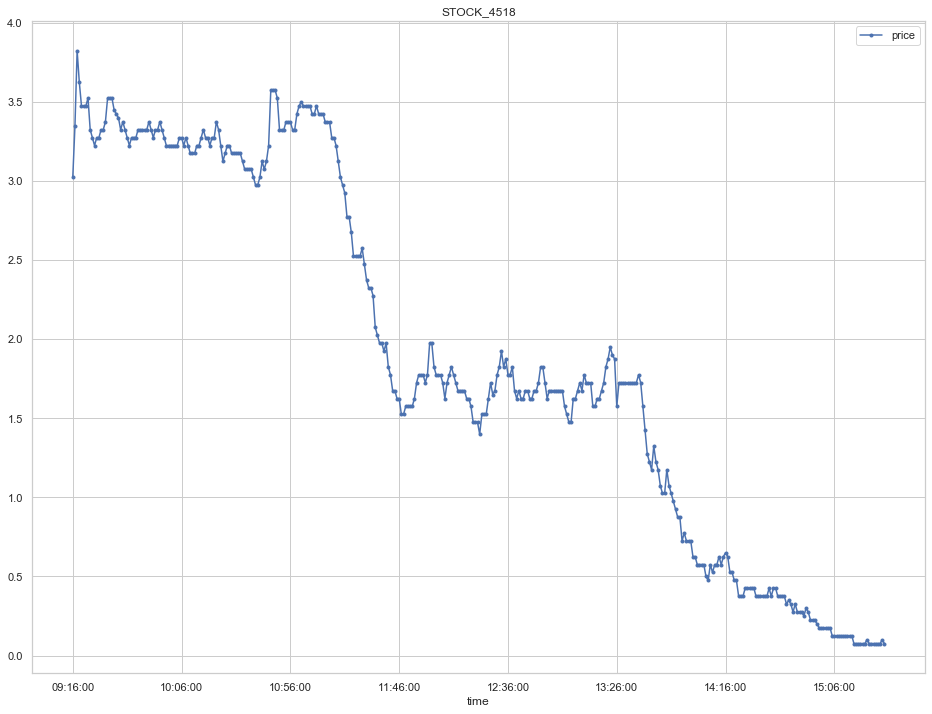

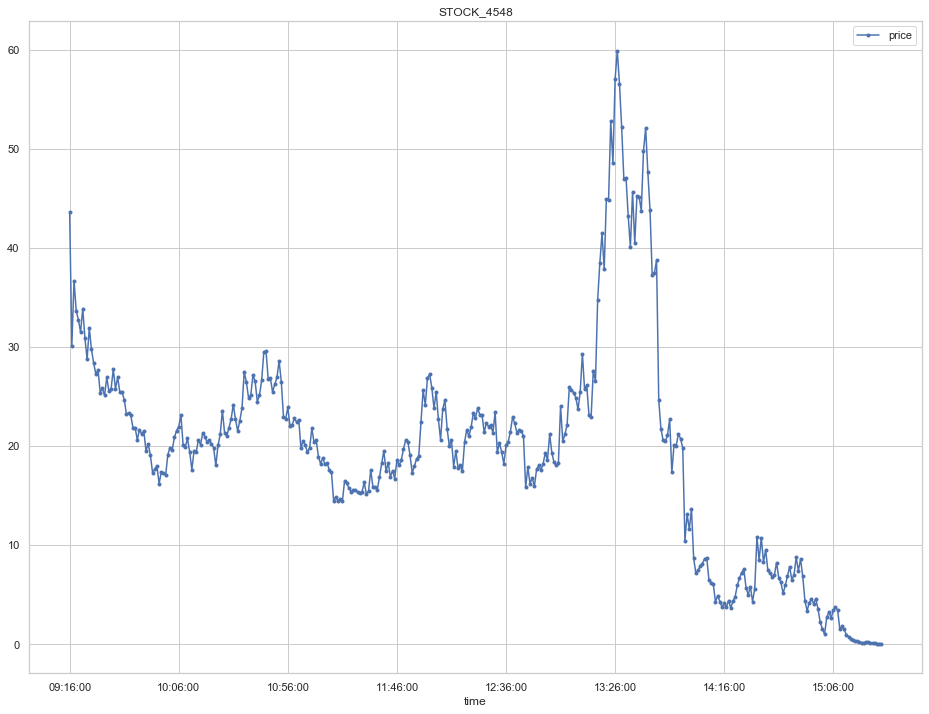

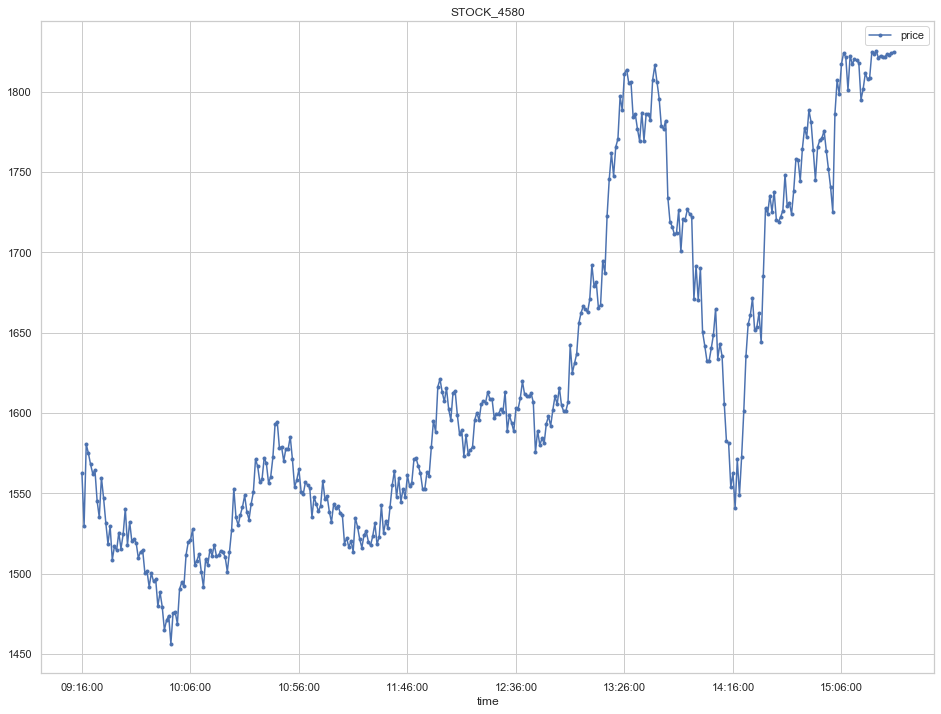

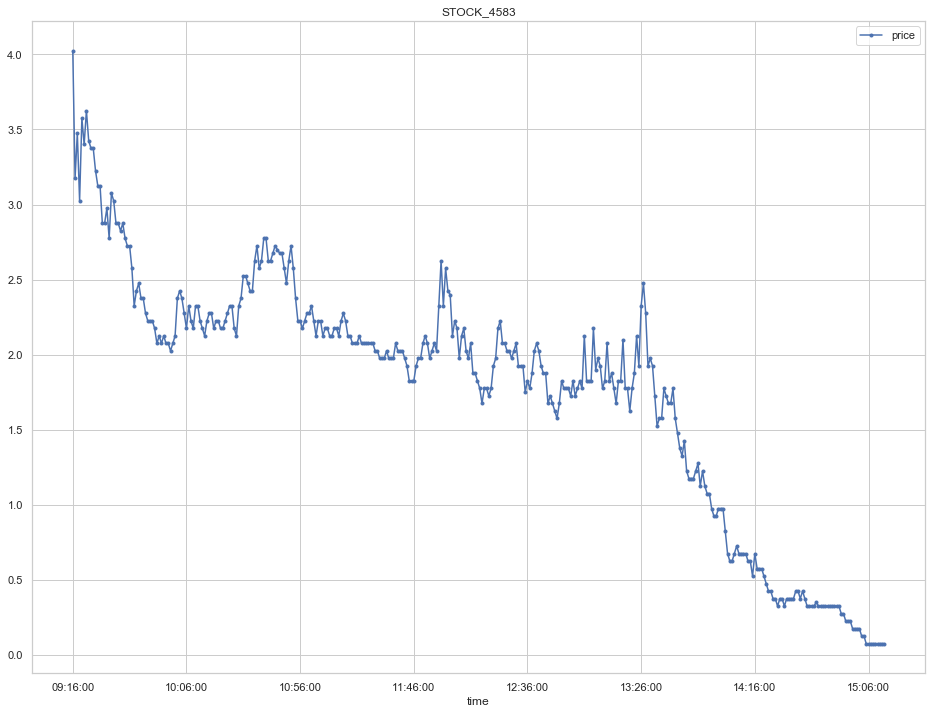

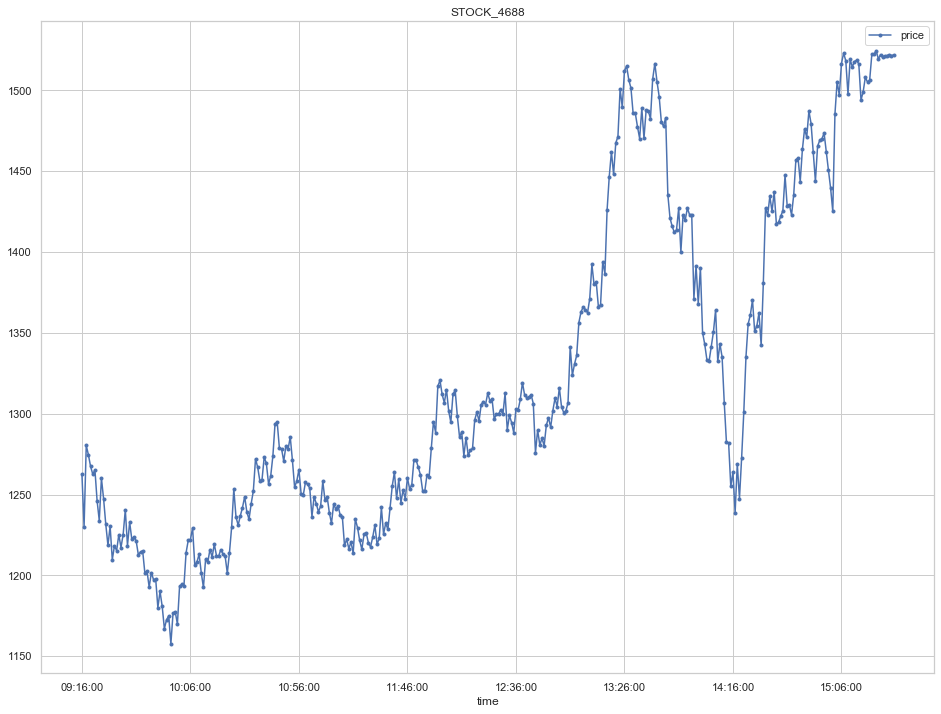

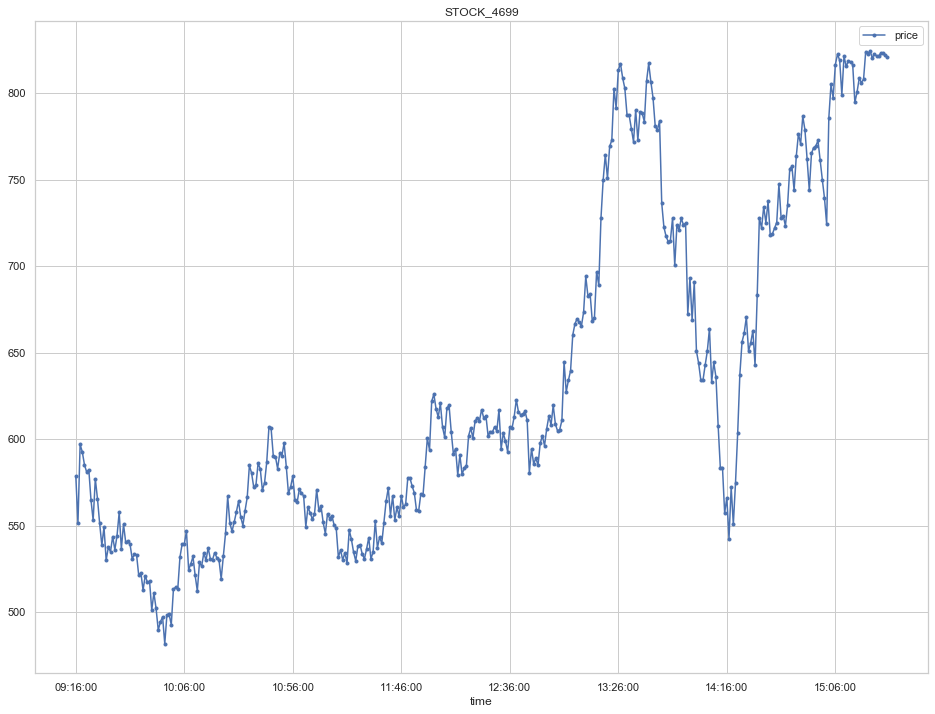

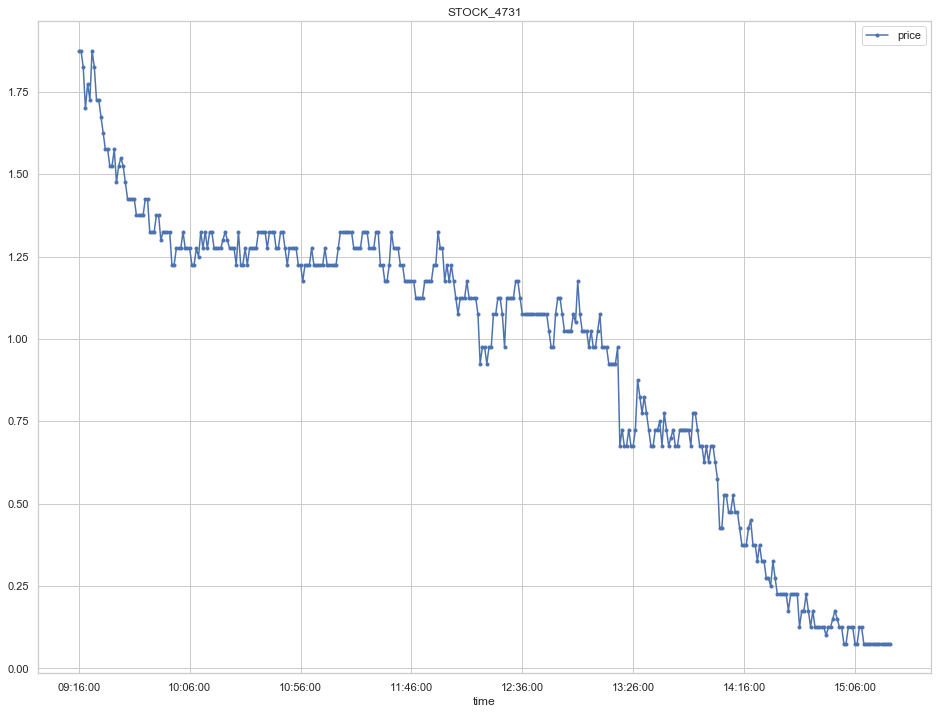

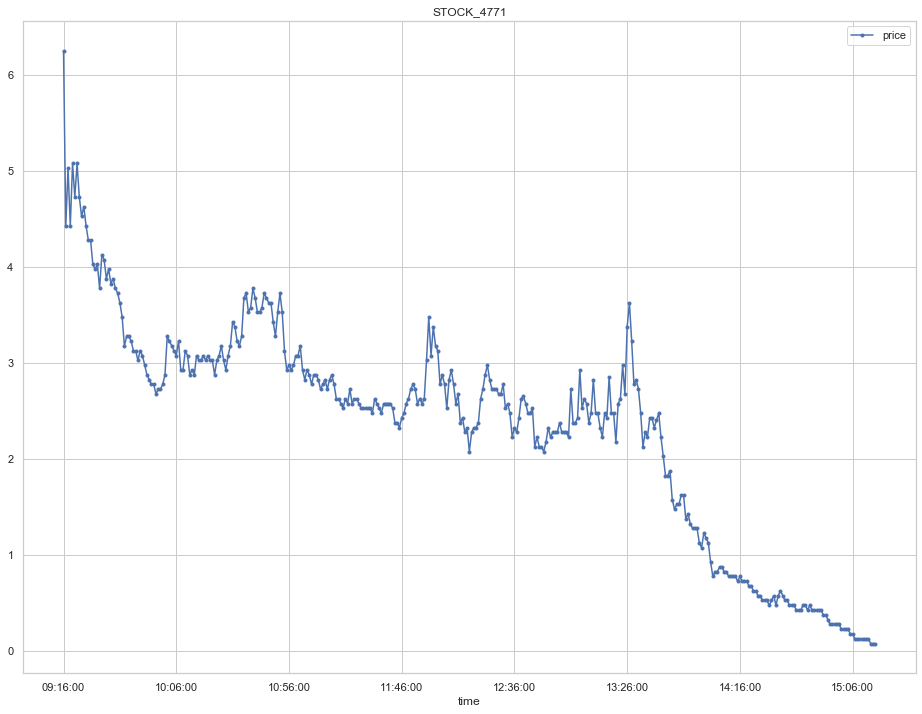

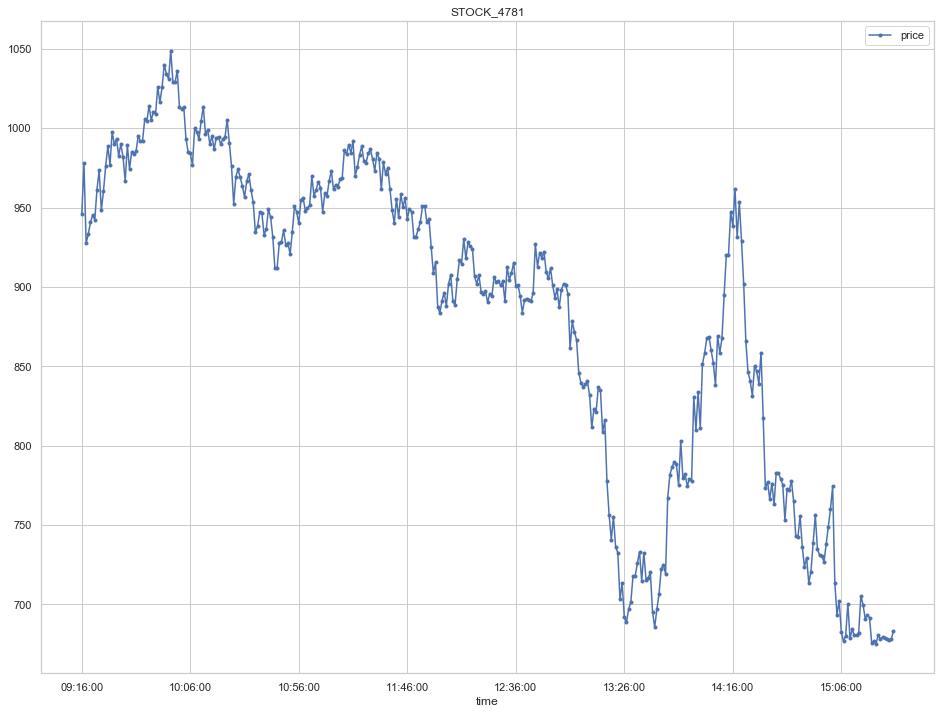

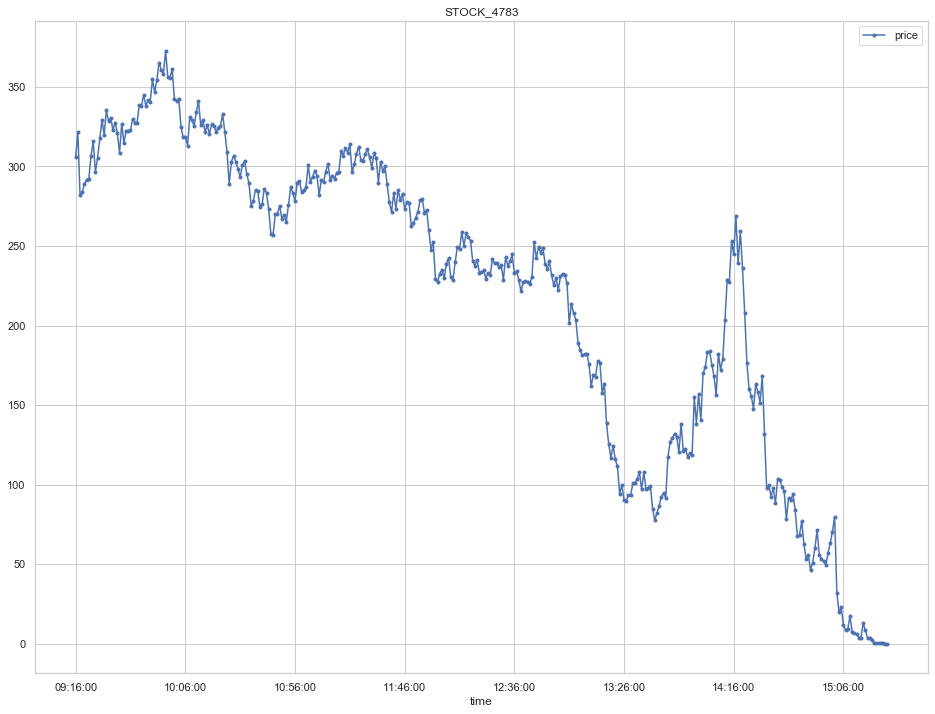

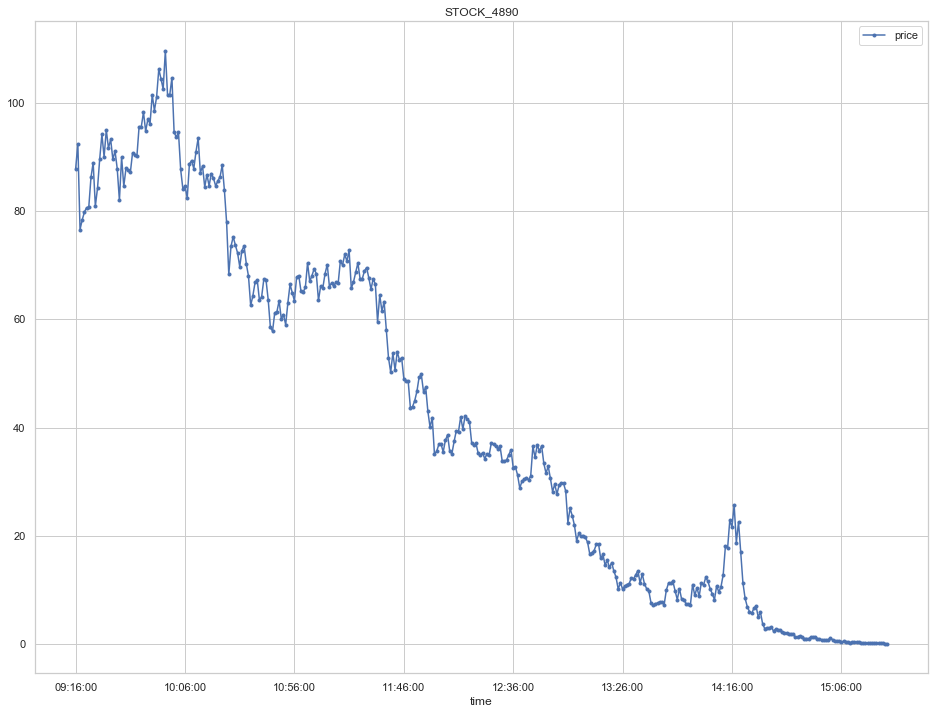

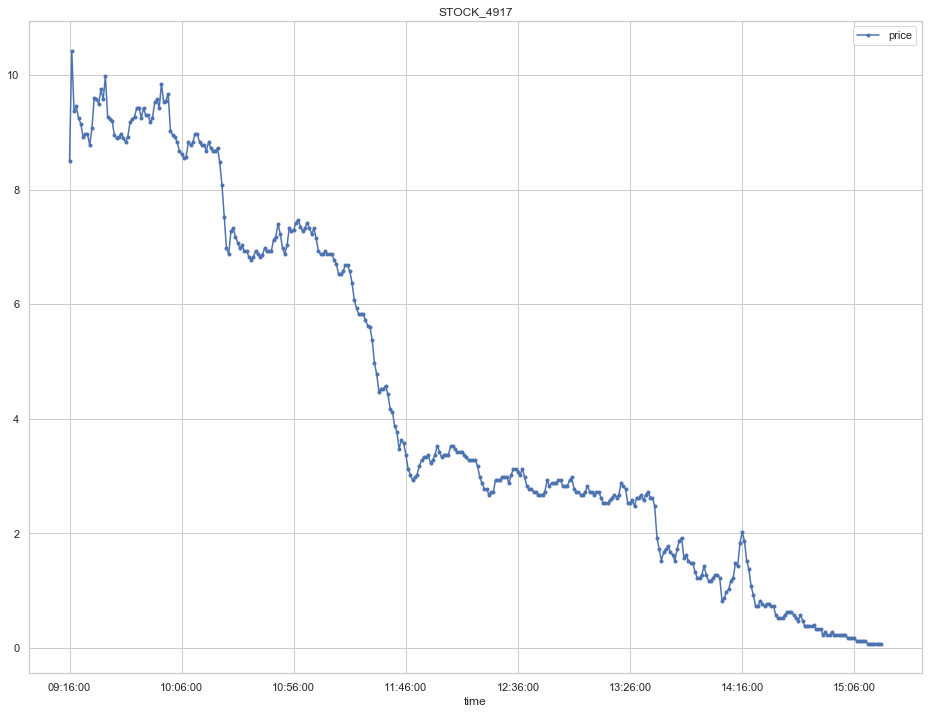

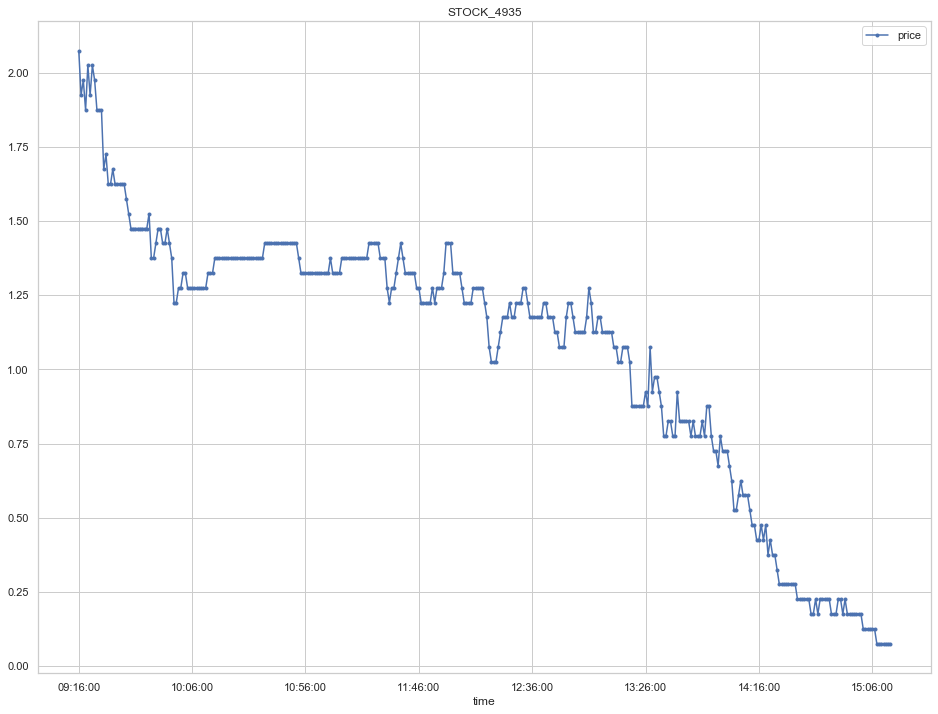

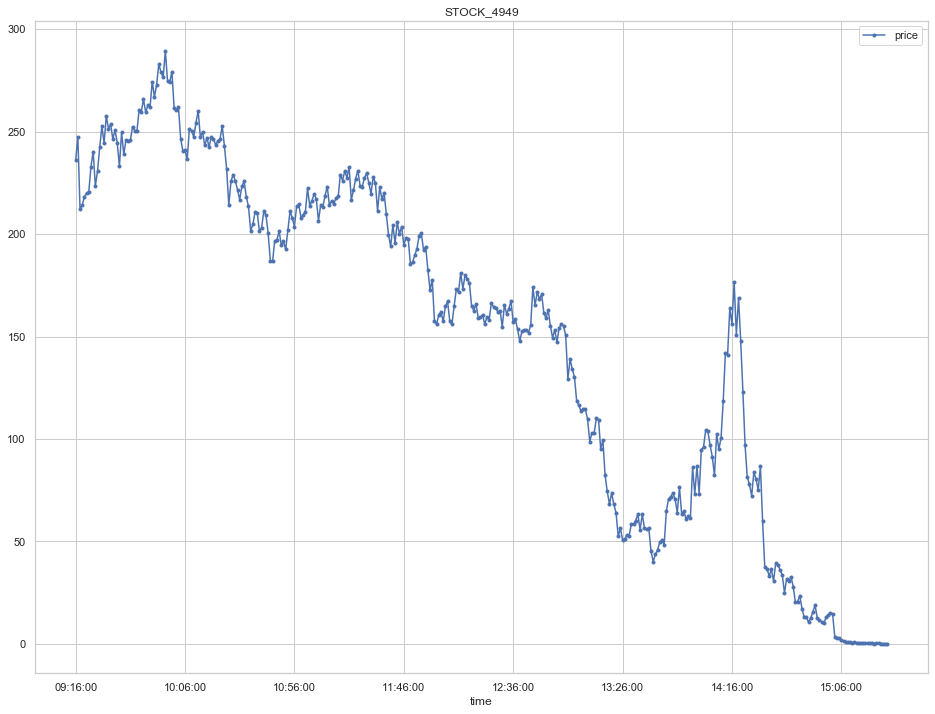

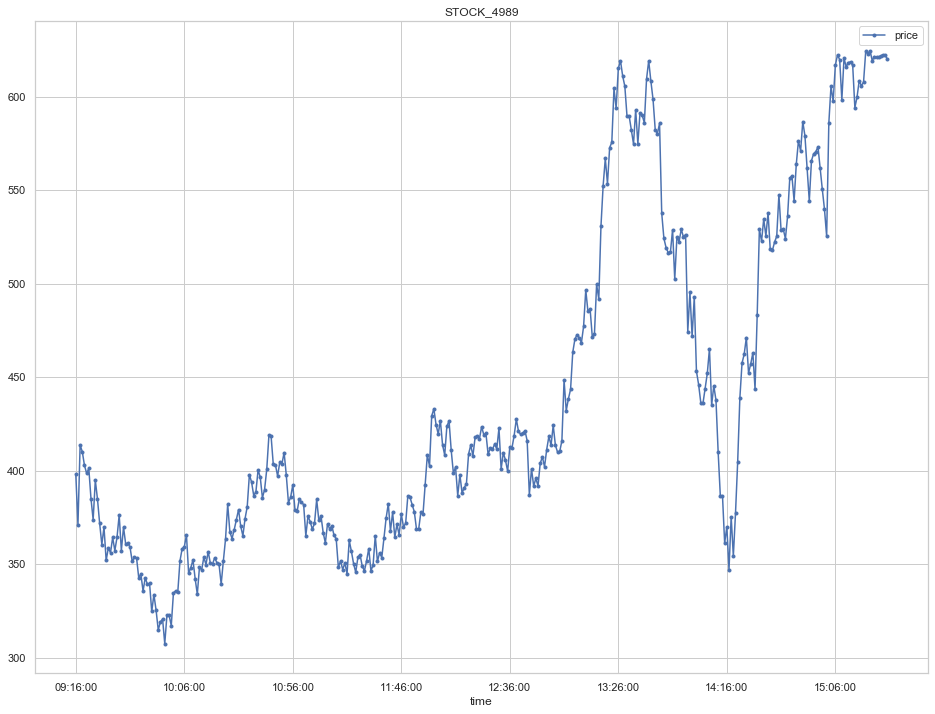

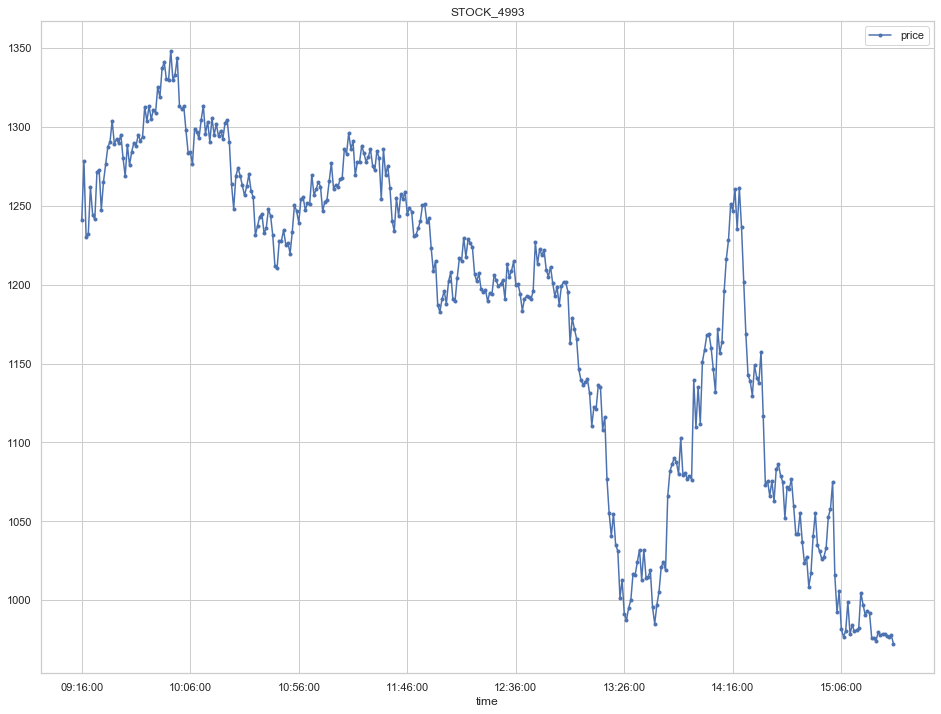

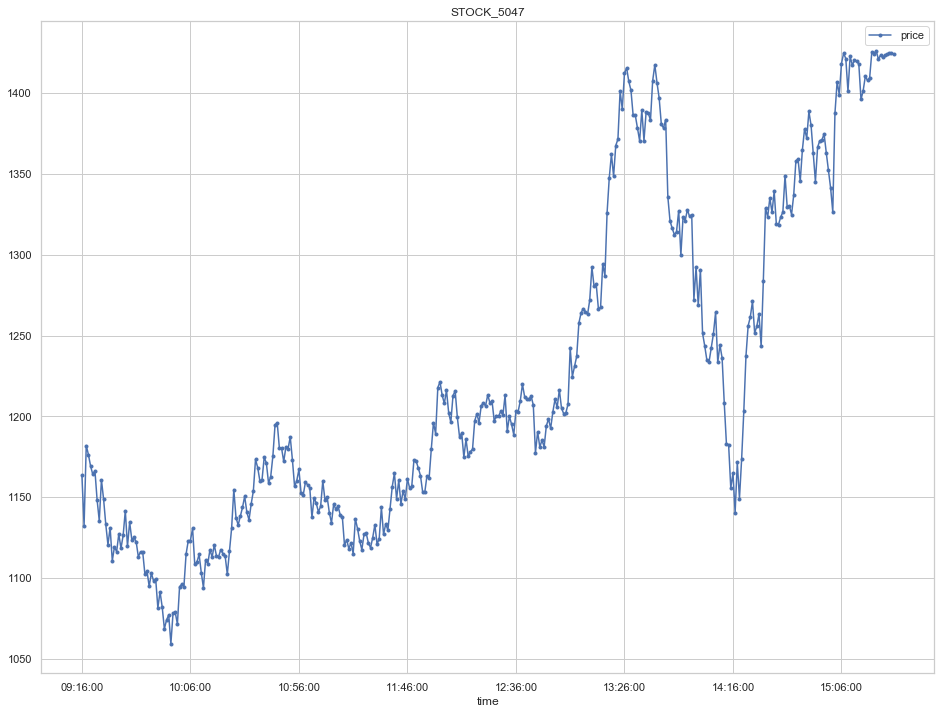

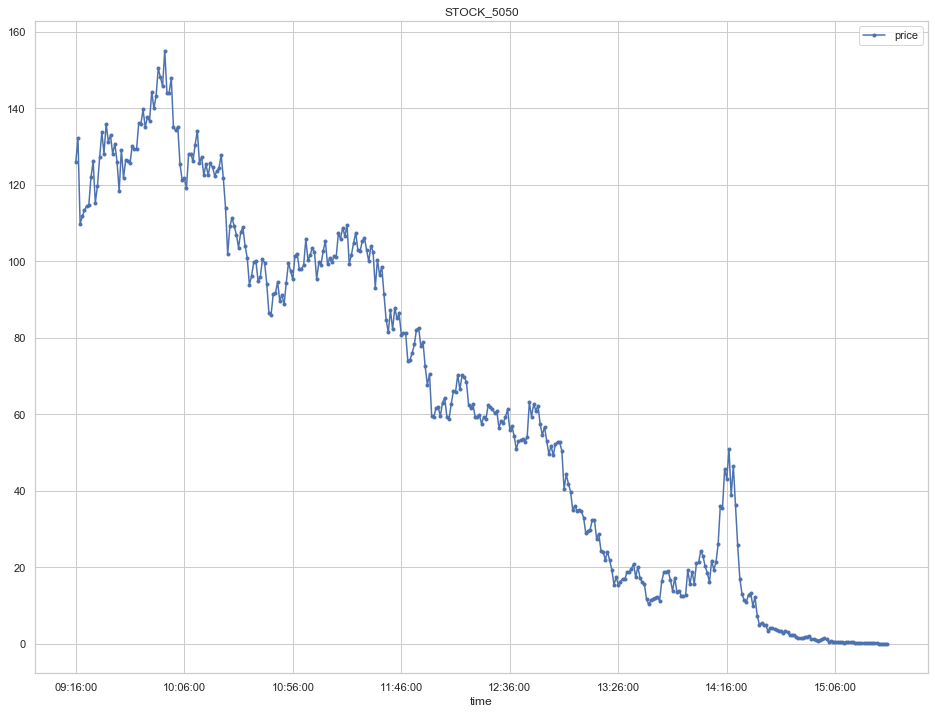

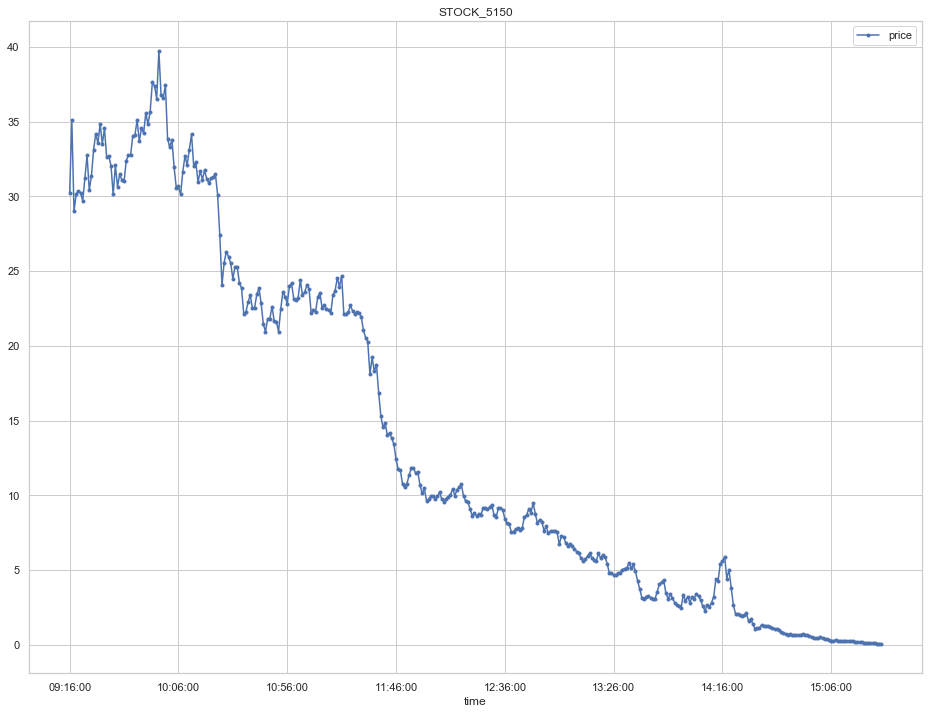

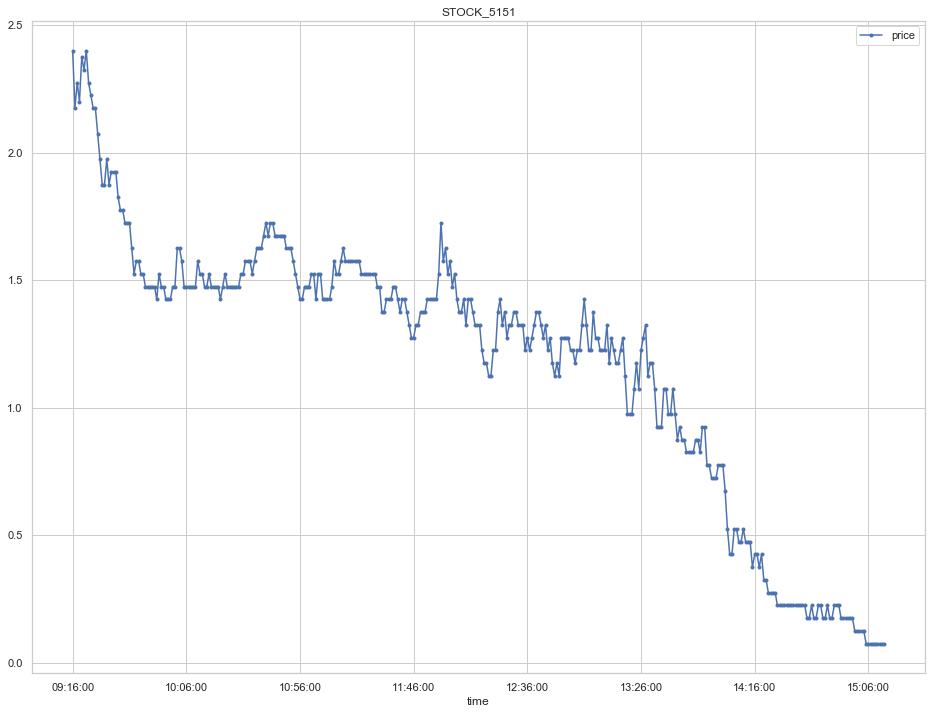

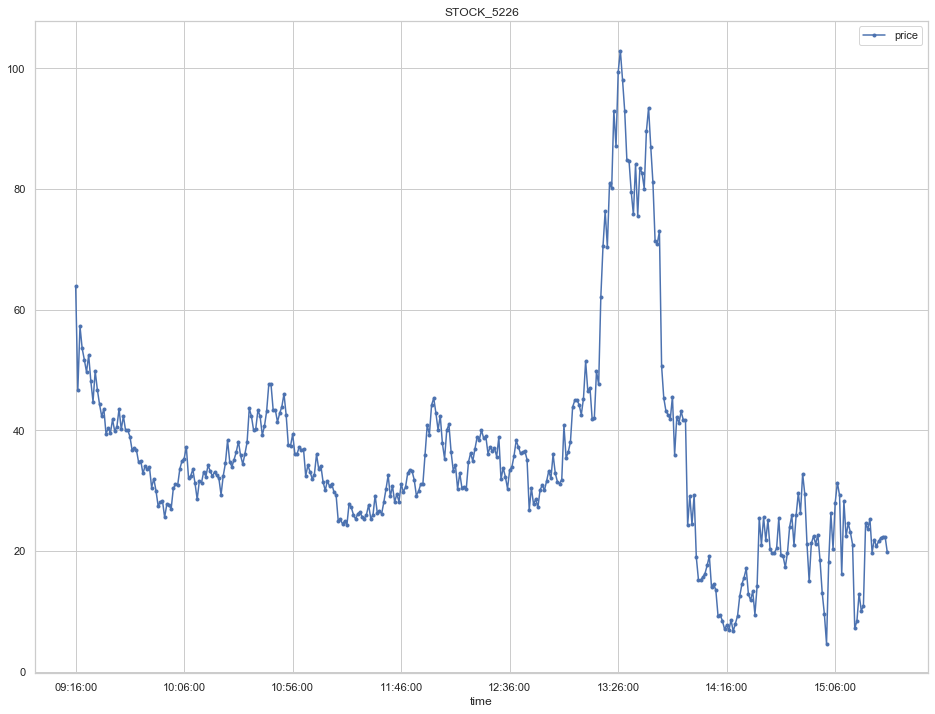

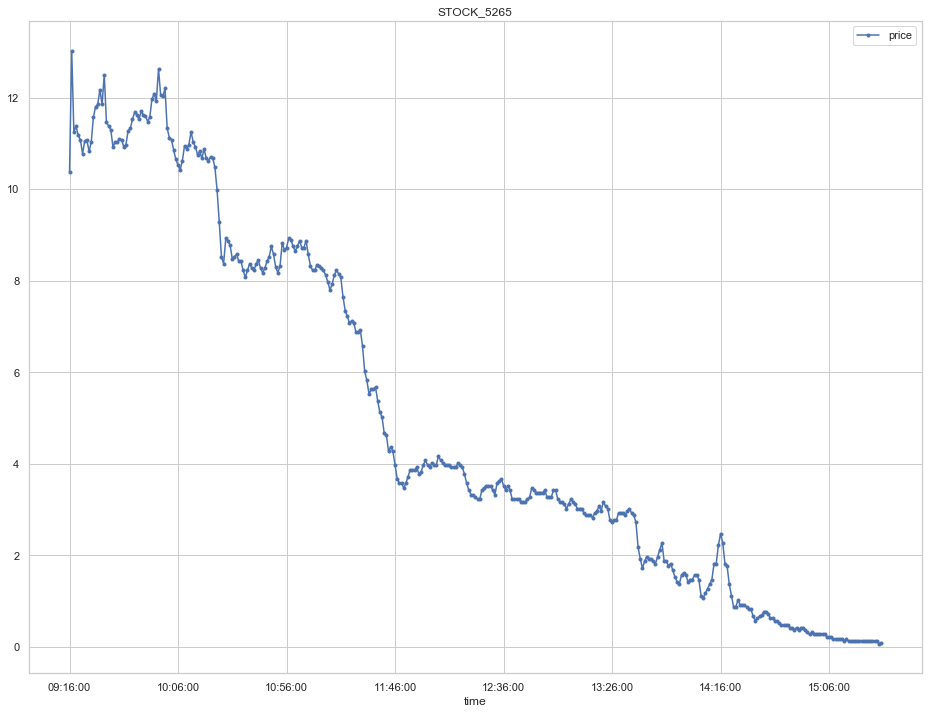

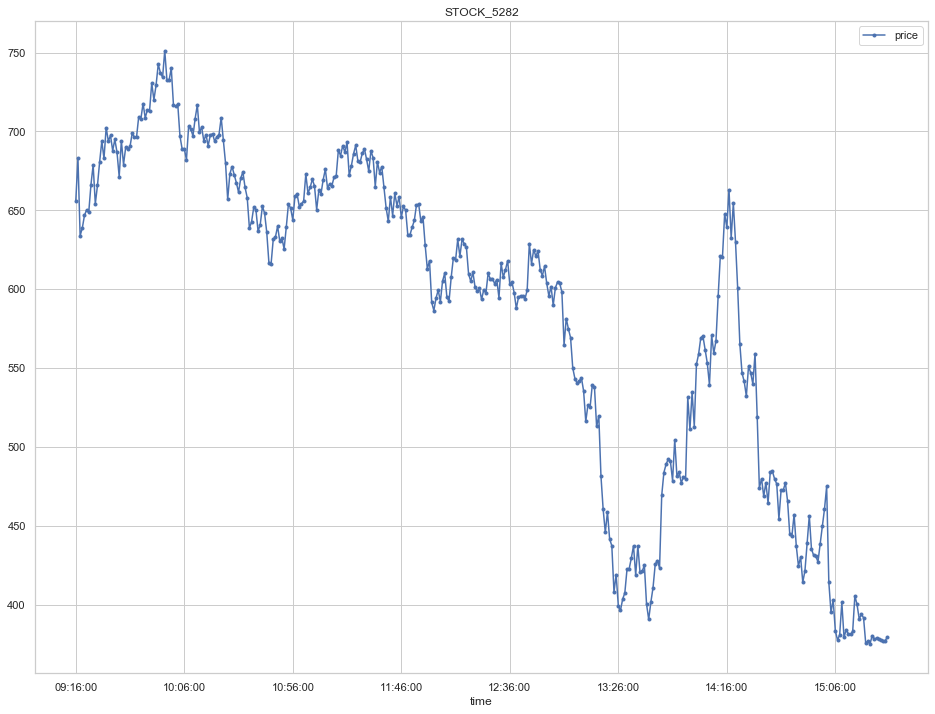

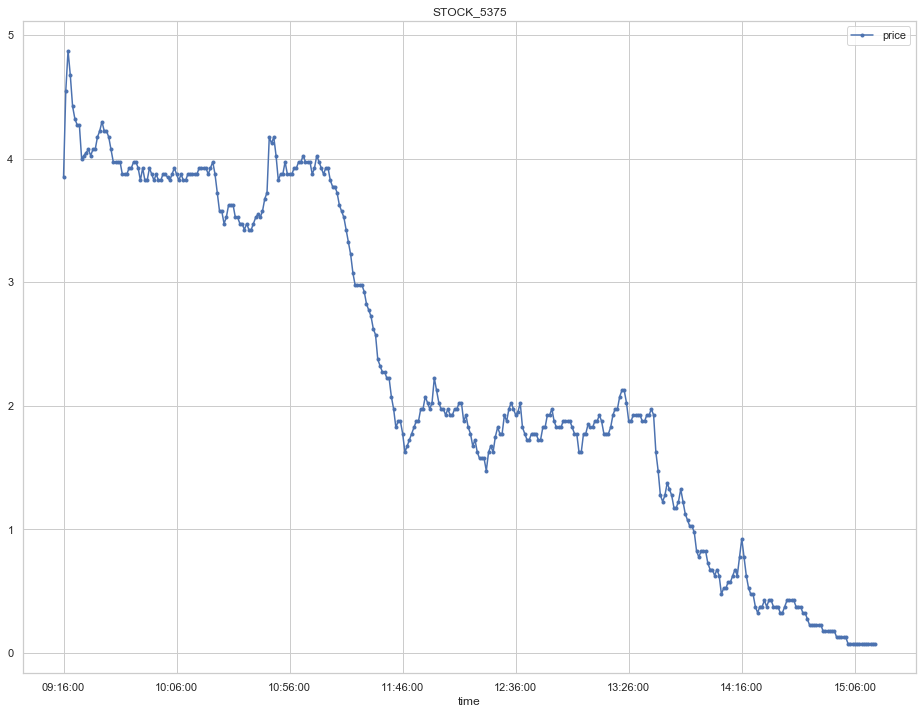

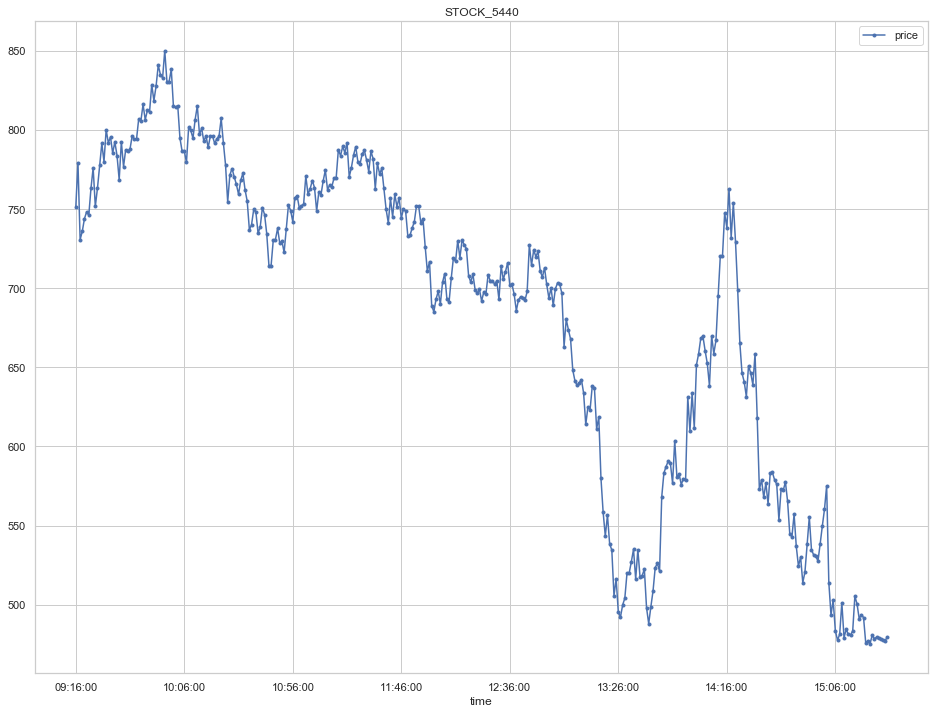

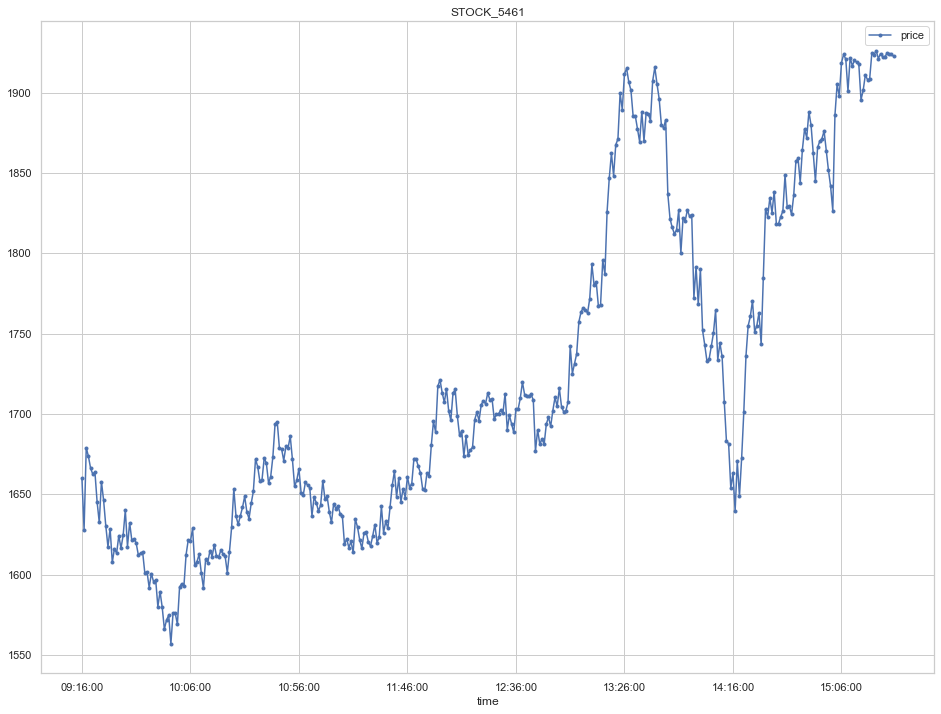

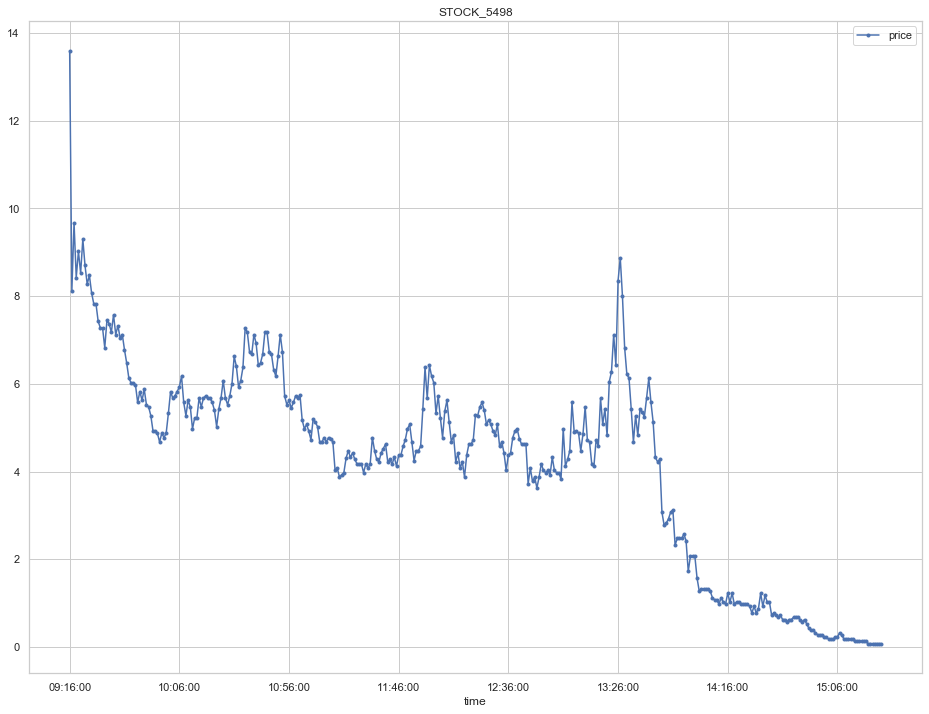

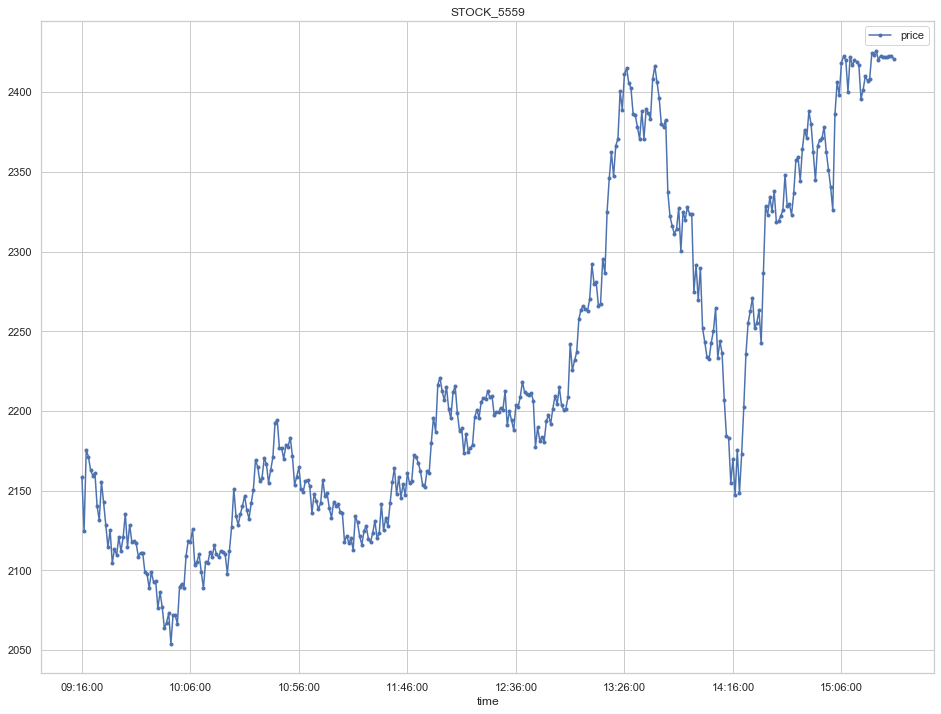

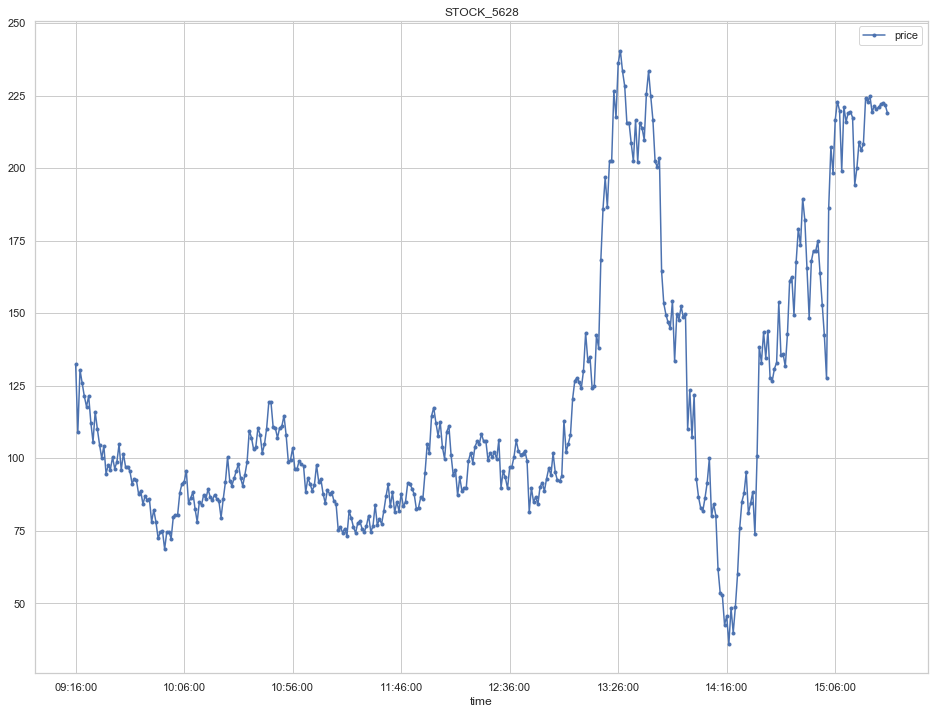

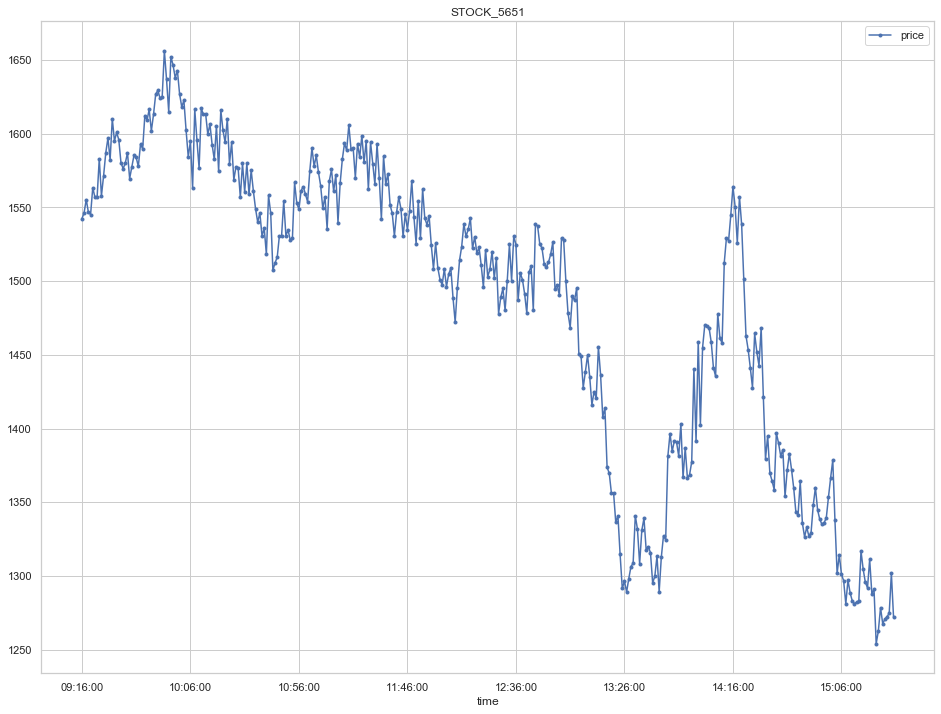

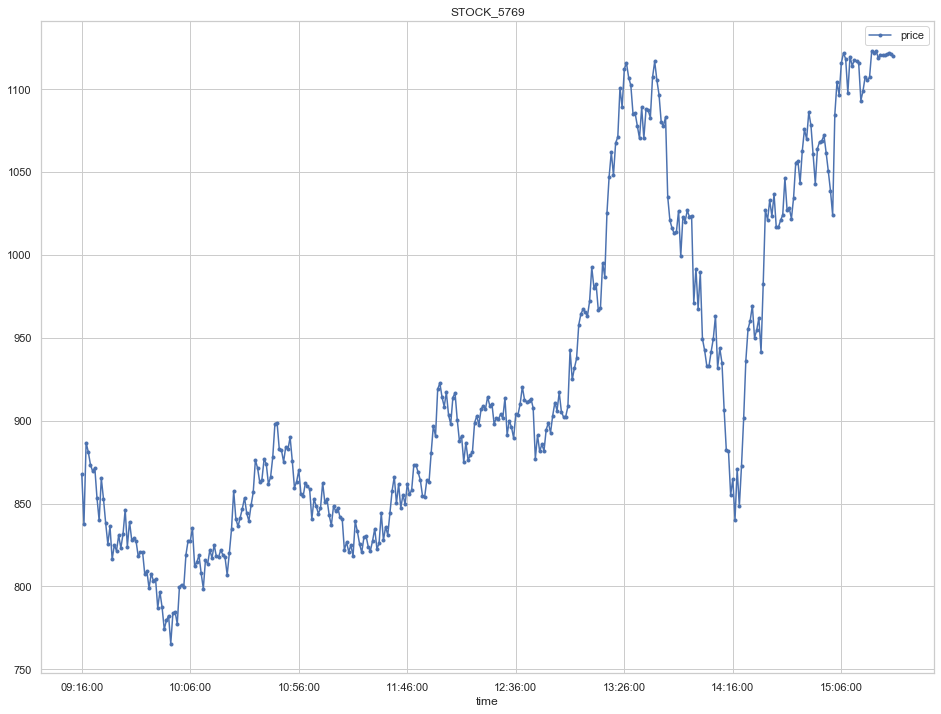

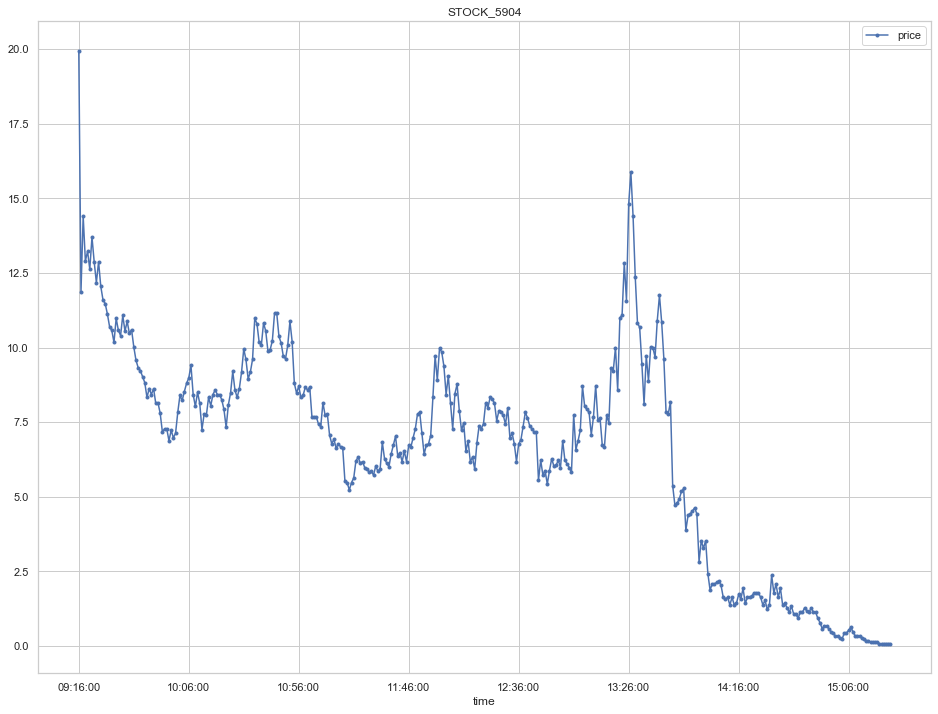

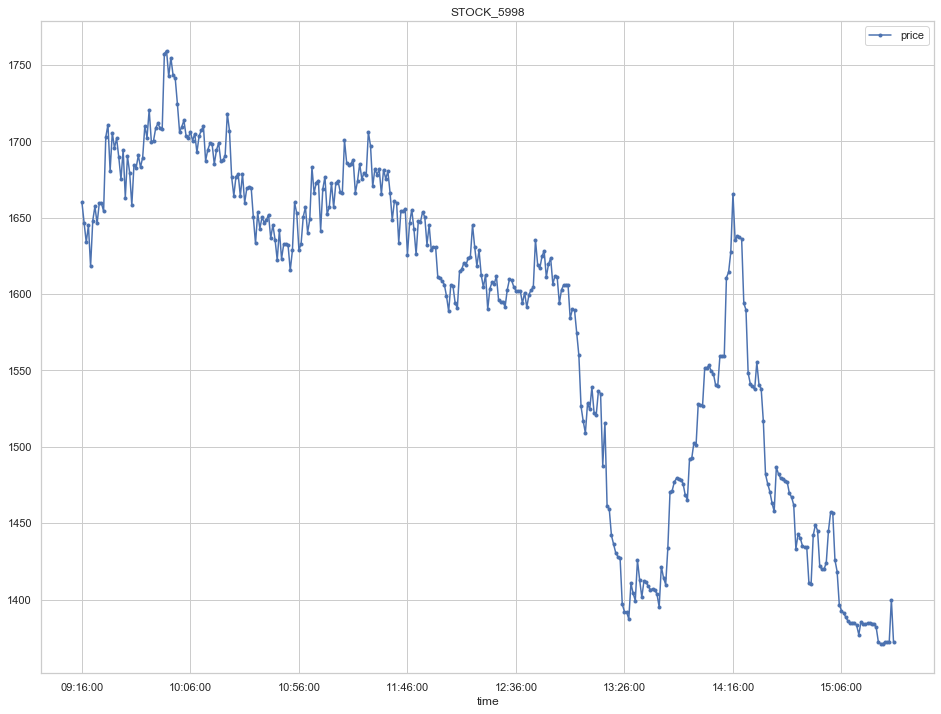

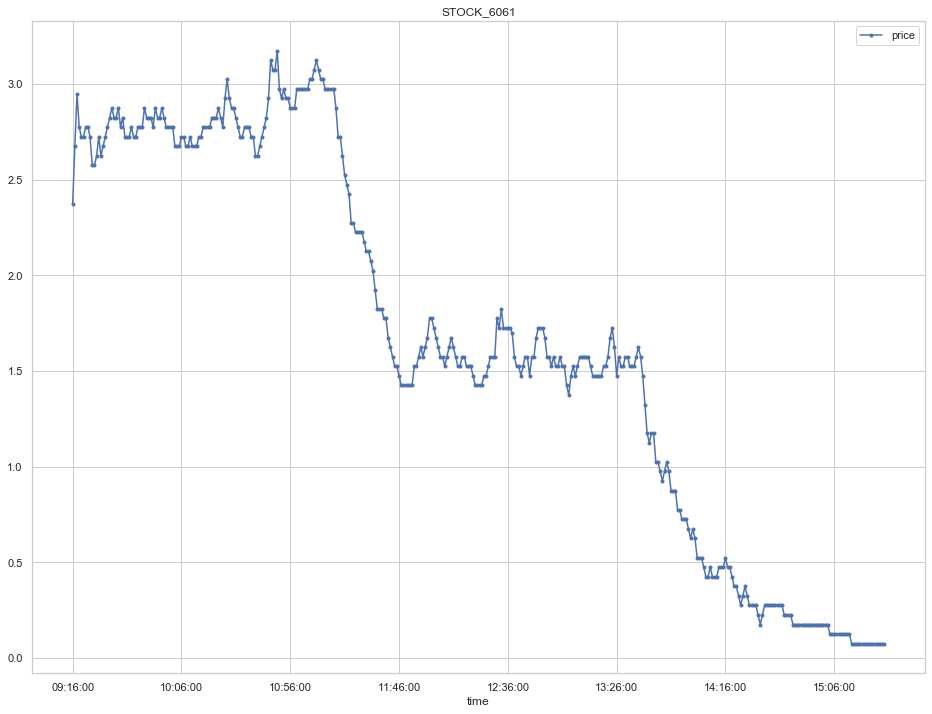

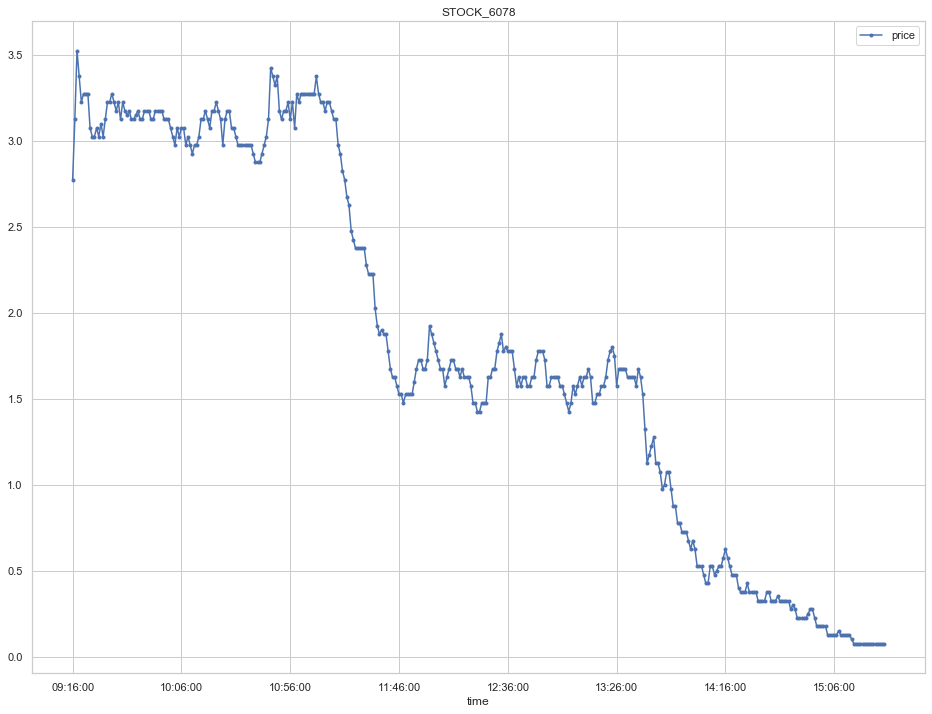

In [46]:
for i in num_stocks_prices:
    part_stock = prices_df[prices_df['symbol']==i]
    part_stock.plot(x='time', y = 'price', kind = 'line', marker='.', title=f"{i}")    

finding maximum intraday drawdown (MDD) for each stock

In [47]:
for i in num_stocks_prices:
    MDD_Stocks = prices_df[prices_df['symbol']==i]
    print(f"{i} : {MDD_Stocks['price'].max() - MDD_Stocks['price'].min()}")
    

STOCK_3130 : 21.775000000000002
STOCK_3138 : 396.32500000000005
STOCK_3140 : 376.54999999999995
STOCK_3177 : 382.4
STOCK_3213 : 4.05
STOCK_3228 : 54.45000000000001
STOCK_3245 : 9.175
STOCK_3311 : 361.70000000000005
STOCK_3337 : 376.2000000000005
STOCK_3365 : 355.65
STOCK_3401 : 1.5999999999999999
STOCK_3415 : 294.1
STOCK_3439 : 379.22499999999997
STOCK_3447 : 378.20000000000005
STOCK_3561 : 149.075
STOCK_3584 : 29.1
STOCK_3643 : 375.75
STOCK_3660 : 4.3
STOCK_3666 : 5.199999999999998
STOCK_3682 : 1.475
STOCK_3683 : 7.55
STOCK_3824 : 239.45000000000002
STOCK_3848 : 374.1750000000002
STOCK_3870 : 388.175
STOCK_3887 : 8.775000000000004
STOCK_3896 : 76.925
STOCK_3940 : 381.7999999999997
STOCK_3954 : 372.65
STOCK_3979 : 262.77500000000015
STOCK_4060 : 373.85000000000014
STOCK_4063 : 363.67499999999995
STOCK_4073 : 3.05
STOCK_4127 : 351.15
STOCK_4137 : 2.0999999999999996
STOCK_4144 : 373.92499999999984
STOCK_4146 : 1.725
STOCK_4154 : 215.675
STOCK_4198 : 392.625
STOCK_4239 : 3.224999999999999